### EXPERIMENT # 1.1 Train(201803-202011), Validation(201803-202011), Test(201803-202011). Train/validation/test obligations are excluyent

In [1]:
import pickle
from sklearn import preprocessing as prep
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error,explained_variance_score
from sklearn.metrics import roc_auc_score, confusion_matrix, silhouette_score,silhouette_samples
import matplotlib.pyplot as plt
from sklearn import cluster
from sklearn.neighbors import kneighbors_graph
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.metrics import *
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import precision_recall_curve
from sklearn.calibration import calibration_curve
from matplotlib import pyplot
from sklearn.metrics import average_precision_score, auc, roc_curve, precision_recall_curve
from sklearn.calibration import CalibratedClassifierCV
from sklearn.preprocessing     import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing
from pprint import pprint
from sklearn.linear_model import LassoCV
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV 
from sklearn.datasets import make_classification
import seaborn as sns
from sklearn.model_selection import *
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import RidgeCV
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import train_test_split
import pickle
from sklearn.model_selection import *
from sklearn.ensemble import GradientBoostingClassifier
# explicitly require this experimental feature
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
# now you can import normally from ensemble
from sklearn.ensemble import HistGradientBoostingClassifier
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',150)
pd.set_option('display.width',1000)

C:\Users\dsosa\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\dsosa\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\dsosa\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 an

## LOAD DATA 

In [2]:
#Base completa para modelo cobranza. 
df = pd.read_csv("D:/dsosa/Score_Cobranza/experimentos_cobranza/exp1_T_V_Fecha/data/propen_banistmo_seleccion_vables.csv",
                 header = 0, sep = ',',float_precision='high')

In [3]:
df.shape

(748943, 226)

In [4]:
df.columns.tolist()

['fecha',
 'id_clte',
 'id_oblg',
 'producto_oblg',
 'bucket_mora_oblg',
 'saldok_oblg',
 'razon_garantia',
 'cupo_oblg',
 'madurez_oblg',
 'restructuracion_oblg',
 'restructuracion_clte',
 'altura_mora_oblg',
 'altura_mora_clte',
 'meses_hasta_vencimiento_oblg',
 'meses_desde_restructuracion_oblg',
 'meses_desde_restructuracion_clte',
 'meses_desde_castigo_oblg',
 'meses_desde_castigo_clte',
 'flag_b2b_oblg',
 'flag_finan_oblg',
 'flag_leas_oblg',
 'flag_auto_oblg',
 'flag_hipo_oblg',
 'flag_pp_oblg',
 'flag_pyme_oblg',
 'flag_sob_oblg',
 'flag_tdc_oblg',
 'descuento_directo_oblg',
 'valor_desembolso_oblg',
 'tasa_oblg',
 'marca_juridico_oblg',
 'modalidad_oblg',
 'marca_perdio_ddir_oblg',
 'marca_rodamiento_oblg',
 'marca_huesped_oblg',
 'tipo_persona_clte',
 'sexo_clte',
 'edad_clte',
 'pago_mes_oblg',
 'razon_pago_oblg',
 'ciclo_facturacion_oblg',
 'dias_hasta_proximo_pago',
 'pago_minimo_oblg',
 'hogan_tipo_clte',
 'numero_organizacion_oblg',
 'marca_buzon_oblg',
 'flag_tipo_garan

### See proportions of 1 and 0 original Y

In [5]:
print(df.propen_y_oblg.value_counts()/df.propen_y_oblg.shape[0],"This is the original Y")

1    0.608791
0    0.391209
Name: propen_y_oblg, dtype: float64 This is the original Y


In [ ]:
#sns.kdeplot(df_b2b["var_respuesta_nueva"],linestyle="--")
#sns.kdeplot(df_finan["var_respuesta_nueva"],linestyle="-.")
#sns.kdeplot(df_sob["propen_y_oblg"])
#sns.kdeplot(df_hipo["var_respuesta_nueva"])
#sns.kdeplot(df_valid["count"])

## TRAIN/VALID/TEST BY TIME

In [6]:
#separete original dataframe in 2 parts: train/valid, rows that appear in training data not appear in validation data
df_ids_unicos = df.id_oblg.unique()

In [7]:
id_train,id_valid = train_test_split(df_ids_unicos,test_size = 0.3,random_state = 123)

In [8]:
df_final_train = df[df['id_oblg'].isin(id_train)]

In [9]:
df_final_train.shape

(523833, 226)

In [10]:
df_final_valid = df[df['id_oblg'].isin(id_valid)]

In [11]:
df_final_valid.shape

(225110, 226)

## Test

In [12]:
df_ids_unicos_valid = df_final_valid.id_oblg.unique()

In [13]:
#test 
id_valid1,id_test = train_test_split(df_ids_unicos_valid,test_size = 0.3,random_state = 123)

In [14]:
df_final_valid1 = df_final_valid[df_final_valid['id_oblg'].isin(id_valid1)]

In [15]:
df_final_valid1.shape

(158738, 226)

In [16]:
df_final_test = df_final_valid[df_final_valid['id_oblg'].isin(id_test)]

In [17]:
df_final_test.shape

(66372, 226)

In [18]:
#validate obligations iid
pd.merge(df_final_train, df_final_valid, how='inner', on='id_oblg')

,fecha_x,id_clte_x,id_oblg,producto_oblg_x,bucket_mora_oblg_x,saldok_oblg_x,razon_garantia_x,cupo_oblg_x,madurez_oblg_x,restructuracion_oblg_x,restructuracion_clte_x,altura_mora_oblg_x,altura_mora_clte_x,meses_hasta_vencimiento_oblg_x,meses_desde_restructuracion_oblg_x,meses_desde_restructuracion_clte_x,meses_desde_castigo_oblg_x,meses_desde_castigo_clte_x,flag_b2b_oblg_x,flag_finan_oblg_x,flag_leas_oblg_x,flag_auto_oblg_x,flag_hipo_oblg_x,flag_pp_oblg_x,flag_pyme_oblg_x,flag_sob_oblg_x,flag_tdc_oblg_x,descuento_directo_oblg_x,valor_desembolso_oblg_x,tasa_oblg_x,marca_juridico_oblg_x,modalidad_oblg_x,marca_perdio_ddir_oblg_x,marca_rodamiento_oblg_x,marca_huesped_oblg_x,tipo_persona_clte_x,sexo_clte_x,edad_clte_x,pago_mes_oblg_x,razon_pago_oblg_x,ciclo_facturacion_oblg_x,dias_hasta_proximo_pago_x,pago_minimo_oblg_x,hogan_tipo_clte_x,numero_organizacion_oblg_x,marca_buzon_oblg_x,flag_tipo_garantia_sb59_1_x,flag_tipo_garantia_sb59_2_x,flag_tipo_garantia_sb59_3_x,flag_tipo_garantia_sb59_4_x,flag_tipo_garantia_sb59_5_x,flag_tipo_garantia_sb59_6_x,flag_tipo_garantia_sb59_7_x,flag_tipo_facilidad_crediticia_1_x,flag_tipo_facilidad_crediticia_2_x,valor_garantia_x,importe_x,meses_desde_avaluo_x,meses_hasta_vencimiento_garantia_x,gestiones_tek_mes_oblg_x,flg_gestion_rpc_oblg_x,flg_gestion_no_rpc_oblg_x,flg_promesas_oblg_x,flg_promesas_ptp_oblg_x,flg_promesas_no_ptp_oblg_x,dias_hasta_promesa_oblg_x,flg_promesa_pendiente_oblg_x,flg_promesa_cumplida_oblg_x,flg_promesa_incumplida_oblg_x,flg_promesa_parcial_oblg_x,flg_promesa_cancelada_oblg_x,promesas_cumplidas_oblg_x,flg_codigo_no_pago_oblg_x,avg_hist_bucket_mora_oblg_3m_x,avg_hist_saldok_oblg_3m_x,...,max_hist_razon_garantia_3m_y,max_hist_altura_mora_oblg_3m_y,max_hist_altura_mora_clte_3m_y,max_hist_pago_mes_oblg_3m_y,max_hist_razon_pago_oblg_3m_y,max_hist_pago_minimo_oblg_3m_y,max_hist_bucket_mora_oblg_6m_y,max_hist_saldok_oblg_6m_y,max_hist_gestiones_tek_mes_oblg_6m_y,max_hist_razon_garantia_6m_y,max_hist_altura_mora_oblg_6m_y,max_hist_altura_mora_clte_6m_y,max_hist_pago_mes_oblg_6m_y,max_hist_razon_pago_oblg_6m_y,max_hist_pago_minimo_oblg_6m_y,max_hist_bucket_mora_oblg_12m_y,max_hist_saldok_oblg_12m_y,max_hist_gestiones_tek_mes_oblg_12m_y,max_hist_razon_garantia_12m_y,max_hist_altura_mora_oblg_12m_y,max_hist_altura_mora_clte_12m_y,max_hist_pago_mes_oblg_12m_y,max_hist_razon_pago_oblg_12m_y,max_hist_pago_minimo_oblg_12m_y,min_hist_bucket_mora_oblg_3m_y,min_hist_saldok_oblg_3m_y,min_hist_gestiones_tek_mes_oblg_3m_y,min_hist_razon_garantia_3m_y,min_hist_altura_mora_oblg_3m_y,min_hist_altura_mora_clte_3m_y,min_hist_pago_mes_oblg_3m_y,min_hist_razon_pago_oblg_3m_y,min_hist_pago_minimo_oblg_3m_y,min_hist_bucket_mora_oblg_6m_y,min_hist_saldok_oblg_6m_y,min_hist_gestiones_tek_mes_oblg_6m_y,min_hist_razon_garantia_6m_y,min_hist_altura_mora_oblg_6m_y,min_hist_altura_mora_clte_6m_y,min_hist_pago_mes_oblg_6m_y,min_hist_razon_pago_oblg_6m_y,min_hist_pago_minimo_oblg_6m_y,min_hist_bucket_mora_oblg_12m_y,min_hist_saldok_oblg_12m_y,min_hist_gestiones_tek_mes_oblg_12m_y,min_hist_razon_garantia_12m_y,min_hist_altura_mora_oblg_12m_y,min_hist_altura_mora_clte_12m_y,min_hist_pago_mes_oblg_12m_y,min_hist_razon_pago_oblg_12m_y,min_hist_pago_minimo_oblg_12m_y,appx_median_hist_bucket_mora_oblg_3m_y,appx_median_hist_saldok_oblg_3m_y,appx_median_hist_gestiones_tek_mes_oblg_3m_y,appx_median_hist_altura_mora_oblg_3m_y,appx_median_hist_altura_mora_clte_3m_y,appx_median_hist_bucket_mora_oblg_6m_y,appx_median_hist_saldok_oblg_6m_y,appx_median_hist_gestiones_tek_mes_oblg_6m_y,appx_median_hist_altura_mora_oblg_6m_y,appx_median_hist_altura_mora_clte_6m_y,appx_median_hist_bucket_mora_oblg_12m_y,appx_median_hist_saldok_oblg_12m_y,appx_median_hist_gestiones_tek_mes_oblg_12m_y,appx_median_hist_altura_mora_oblg_12m_y,appx_median_hist_altura_mora_clte_12m_y,opcion_otorgada_clte_alivio_2_y,situacion_clte_alivio_2_y,solicitud_clte_alivio_2_y,opcion_otorgada_clte_alivio_3_y,situacion_clte_alivio_3_y,solicitud_clte_alivio_3_y,marca

In [19]:
#validate obligations iid
pd.merge(df_final_train, df_final_test, how='inner', on='id_oblg')

,fecha_x,id_clte_x,id_oblg,producto_oblg_x,bucket_mora_oblg_x,saldok_oblg_x,razon_garantia_x,cupo_oblg_x,madurez_oblg_x,restructuracion_oblg_x,restructuracion_clte_x,altura_mora_oblg_x,altura_mora_clte_x,meses_hasta_vencimiento_oblg_x,meses_desde_restructuracion_oblg_x,meses_desde_restructuracion_clte_x,meses_desde_castigo_oblg_x,meses_desde_castigo_clte_x,flag_b2b_oblg_x,flag_finan_oblg_x,flag_leas_oblg_x,flag_auto_oblg_x,flag_hipo_oblg_x,flag_pp_oblg_x,flag_pyme_oblg_x,flag_sob_oblg_x,flag_tdc_oblg_x,descuento_directo_oblg_x,valor_desembolso_oblg_x,tasa_oblg_x,marca_juridico_oblg_x,modalidad_oblg_x,marca_perdio_ddir_oblg_x,marca_rodamiento_oblg_x,marca_huesped_oblg_x,tipo_persona_clte_x,sexo_clte_x,edad_clte_x,pago_mes_oblg_x,razon_pago_oblg_x,ciclo_facturacion_oblg_x,dias_hasta_proximo_pago_x,pago_minimo_oblg_x,hogan_tipo_clte_x,numero_organizacion_oblg_x,marca_buzon_oblg_x,flag_tipo_garantia_sb59_1_x,flag_tipo_garantia_sb59_2_x,flag_tipo_garantia_sb59_3_x,flag_tipo_garantia_sb59_4_x,flag_tipo_garantia_sb59_5_x,flag_tipo_garantia_sb59_6_x,flag_tipo_garantia_sb59_7_x,flag_tipo_facilidad_crediticia_1_x,flag_tipo_facilidad_crediticia_2_x,valor_garantia_x,importe_x,meses_desde_avaluo_x,meses_hasta_vencimiento_garantia_x,gestiones_tek_mes_oblg_x,flg_gestion_rpc_oblg_x,flg_gestion_no_rpc_oblg_x,flg_promesas_oblg_x,flg_promesas_ptp_oblg_x,flg_promesas_no_ptp_oblg_x,dias_hasta_promesa_oblg_x,flg_promesa_pendiente_oblg_x,flg_promesa_cumplida_oblg_x,flg_promesa_incumplida_oblg_x,flg_promesa_parcial_oblg_x,flg_promesa_cancelada_oblg_x,promesas_cumplidas_oblg_x,flg_codigo_no_pago_oblg_x,avg_hist_bucket_mora_oblg_3m_x,avg_hist_saldok_oblg_3m_x,...,max_hist_razon_garantia_3m_y,max_hist_altura_mora_oblg_3m_y,max_hist_altura_mora_clte_3m_y,max_hist_pago_mes_oblg_3m_y,max_hist_razon_pago_oblg_3m_y,max_hist_pago_minimo_oblg_3m_y,max_hist_bucket_mora_oblg_6m_y,max_hist_saldok_oblg_6m_y,max_hist_gestiones_tek_mes_oblg_6m_y,max_hist_razon_garantia_6m_y,max_hist_altura_mora_oblg_6m_y,max_hist_altura_mora_clte_6m_y,max_hist_pago_mes_oblg_6m_y,max_hist_razon_pago_oblg_6m_y,max_hist_pago_minimo_oblg_6m_y,max_hist_bucket_mora_oblg_12m_y,max_hist_saldok_oblg_12m_y,max_hist_gestiones_tek_mes_oblg_12m_y,max_hist_razon_garantia_12m_y,max_hist_altura_mora_oblg_12m_y,max_hist_altura_mora_clte_12m_y,max_hist_pago_mes_oblg_12m_y,max_hist_razon_pago_oblg_12m_y,max_hist_pago_minimo_oblg_12m_y,min_hist_bucket_mora_oblg_3m_y,min_hist_saldok_oblg_3m_y,min_hist_gestiones_tek_mes_oblg_3m_y,min_hist_razon_garantia_3m_y,min_hist_altura_mora_oblg_3m_y,min_hist_altura_mora_clte_3m_y,min_hist_pago_mes_oblg_3m_y,min_hist_razon_pago_oblg_3m_y,min_hist_pago_minimo_oblg_3m_y,min_hist_bucket_mora_oblg_6m_y,min_hist_saldok_oblg_6m_y,min_hist_gestiones_tek_mes_oblg_6m_y,min_hist_razon_garantia_6m_y,min_hist_altura_mora_oblg_6m_y,min_hist_altura_mora_clte_6m_y,min_hist_pago_mes_oblg_6m_y,min_hist_razon_pago_oblg_6m_y,min_hist_pago_minimo_oblg_6m_y,min_hist_bucket_mora_oblg_12m_y,min_hist_saldok_oblg_12m_y,min_hist_gestiones_tek_mes_oblg_12m_y,min_hist_razon_garantia_12m_y,min_hist_altura_mora_oblg_12m_y,min_hist_altura_mora_clte_12m_y,min_hist_pago_mes_oblg_12m_y,min_hist_razon_pago_oblg_12m_y,min_hist_pago_minimo_oblg_12m_y,appx_median_hist_bucket_mora_oblg_3m_y,appx_median_hist_saldok_oblg_3m_y,appx_median_hist_gestiones_tek_mes_oblg_3m_y,appx_median_hist_altura_mora_oblg_3m_y,appx_median_hist_altura_mora_clte_3m_y,appx_median_hist_bucket_mora_oblg_6m_y,appx_median_hist_saldok_oblg_6m_y,appx_median_hist_gestiones_tek_mes_oblg_6m_y,appx_median_hist_altura_mora_oblg_6m_y,appx_median_hist_altura_mora_clte_6m_y,appx_median_hist_bucket_mora_oblg_12m_y,appx_median_hist_saldok_oblg_12m_y,appx_median_hist_gestiones_tek_mes_oblg_12m_y,appx_median_hist_altura_mora_oblg_12m_y,appx_median_hist_altura_mora_clte_12m_y,opcion_otorgada_clte_alivio_2_y,situacion_clte_alivio_2_y,solicitud_clte_alivio_2_y,opcion_otorgada_clte_alivio_3_y,situacion_clte_alivio_3_y,solicitud_clte_alivio_3_y,marca

In [20]:
#validate obligations iid
pd.merge(df_final_valid1, df_final_test, how='inner', on='id_oblg')

,fecha_x,id_clte_x,id_oblg,producto_oblg_x,bucket_mora_oblg_x,saldok_oblg_x,razon_garantia_x,cupo_oblg_x,madurez_oblg_x,restructuracion_oblg_x,restructuracion_clte_x,altura_mora_oblg_x,altura_mora_clte_x,meses_hasta_vencimiento_oblg_x,meses_desde_restructuracion_oblg_x,meses_desde_restructuracion_clte_x,meses_desde_castigo_oblg_x,meses_desde_castigo_clte_x,flag_b2b_oblg_x,flag_finan_oblg_x,flag_leas_oblg_x,flag_auto_oblg_x,flag_hipo_oblg_x,flag_pp_oblg_x,flag_pyme_oblg_x,flag_sob_oblg_x,flag_tdc_oblg_x,descuento_directo_oblg_x,valor_desembolso_oblg_x,tasa_oblg_x,marca_juridico_oblg_x,modalidad_oblg_x,marca_perdio_ddir_oblg_x,marca_rodamiento_oblg_x,marca_huesped_oblg_x,tipo_persona_clte_x,sexo_clte_x,edad_clte_x,pago_mes_oblg_x,razon_pago_oblg_x,ciclo_facturacion_oblg_x,dias_hasta_proximo_pago_x,pago_minimo_oblg_x,hogan_tipo_clte_x,numero_organizacion_oblg_x,marca_buzon_oblg_x,flag_tipo_garantia_sb59_1_x,flag_tipo_garantia_sb59_2_x,flag_tipo_garantia_sb59_3_x,flag_tipo_garantia_sb59_4_x,flag_tipo_garantia_sb59_5_x,flag_tipo_garantia_sb59_6_x,flag_tipo_garantia_sb59_7_x,flag_tipo_facilidad_crediticia_1_x,flag_tipo_facilidad_crediticia_2_x,valor_garantia_x,importe_x,meses_desde_avaluo_x,meses_hasta_vencimiento_garantia_x,gestiones_tek_mes_oblg_x,flg_gestion_rpc_oblg_x,flg_gestion_no_rpc_oblg_x,flg_promesas_oblg_x,flg_promesas_ptp_oblg_x,flg_promesas_no_ptp_oblg_x,dias_hasta_promesa_oblg_x,flg_promesa_pendiente_oblg_x,flg_promesa_cumplida_oblg_x,flg_promesa_incumplida_oblg_x,flg_promesa_parcial_oblg_x,flg_promesa_cancelada_oblg_x,promesas_cumplidas_oblg_x,flg_codigo_no_pago_oblg_x,avg_hist_bucket_mora_oblg_3m_x,avg_hist_saldok_oblg_3m_x,...,max_hist_razon_garantia_3m_y,max_hist_altura_mora_oblg_3m_y,max_hist_altura_mora_clte_3m_y,max_hist_pago_mes_oblg_3m_y,max_hist_razon_pago_oblg_3m_y,max_hist_pago_minimo_oblg_3m_y,max_hist_bucket_mora_oblg_6m_y,max_hist_saldok_oblg_6m_y,max_hist_gestiones_tek_mes_oblg_6m_y,max_hist_razon_garantia_6m_y,max_hist_altura_mora_oblg_6m_y,max_hist_altura_mora_clte_6m_y,max_hist_pago_mes_oblg_6m_y,max_hist_razon_pago_oblg_6m_y,max_hist_pago_minimo_oblg_6m_y,max_hist_bucket_mora_oblg_12m_y,max_hist_saldok_oblg_12m_y,max_hist_gestiones_tek_mes_oblg_12m_y,max_hist_razon_garantia_12m_y,max_hist_altura_mora_oblg_12m_y,max_hist_altura_mora_clte_12m_y,max_hist_pago_mes_oblg_12m_y,max_hist_razon_pago_oblg_12m_y,max_hist_pago_minimo_oblg_12m_y,min_hist_bucket_mora_oblg_3m_y,min_hist_saldok_oblg_3m_y,min_hist_gestiones_tek_mes_oblg_3m_y,min_hist_razon_garantia_3m_y,min_hist_altura_mora_oblg_3m_y,min_hist_altura_mora_clte_3m_y,min_hist_pago_mes_oblg_3m_y,min_hist_razon_pago_oblg_3m_y,min_hist_pago_minimo_oblg_3m_y,min_hist_bucket_mora_oblg_6m_y,min_hist_saldok_oblg_6m_y,min_hist_gestiones_tek_mes_oblg_6m_y,min_hist_razon_garantia_6m_y,min_hist_altura_mora_oblg_6m_y,min_hist_altura_mora_clte_6m_y,min_hist_pago_mes_oblg_6m_y,min_hist_razon_pago_oblg_6m_y,min_hist_pago_minimo_oblg_6m_y,min_hist_bucket_mora_oblg_12m_y,min_hist_saldok_oblg_12m_y,min_hist_gestiones_tek_mes_oblg_12m_y,min_hist_razon_garantia_12m_y,min_hist_altura_mora_oblg_12m_y,min_hist_altura_mora_clte_12m_y,min_hist_pago_mes_oblg_12m_y,min_hist_razon_pago_oblg_12m_y,min_hist_pago_minimo_oblg_12m_y,appx_median_hist_bucket_mora_oblg_3m_y,appx_median_hist_saldok_oblg_3m_y,appx_median_hist_gestiones_tek_mes_oblg_3m_y,appx_median_hist_altura_mora_oblg_3m_y,appx_median_hist_altura_mora_clte_3m_y,appx_median_hist_bucket_mora_oblg_6m_y,appx_median_hist_saldok_oblg_6m_y,appx_median_hist_gestiones_tek_mes_oblg_6m_y,appx_median_hist_altura_mora_oblg_6m_y,appx_median_hist_altura_mora_clte_6m_y,appx_median_hist_bucket_mora_oblg_12m_y,appx_median_hist_saldok_oblg_12m_y,appx_median_hist_gestiones_tek_mes_oblg_12m_y,appx_median_hist_altura_mora_oblg_12m_y,appx_median_hist_altura_mora_clte_12m_y,opcion_otorgada_clte_alivio_2_y,situacion_clte_alivio_2_y,solicitud_clte_alivio_2_y,opcion_otorgada_clte_alivio_3_y,situacion_clte_alivio_3_y,solicitud_clte_alivio_3_y,marca

In [21]:
#train
df_train = df_final_train[(df_final_train["fecha"] >=201803)]
df_train["fecha"] = pd.to_datetime(df_train['fecha'].apply(lambda x: str(x)[:4]+"-"+str(x)[-2:]), format='%Y-%m')

In [22]:
df_train.shape

(523833, 226)

In [23]:
#valid
df_valid = df_final_valid1[(df_final_valid1["fecha"] >= 201803)]
df_valid["fecha"] = pd.to_datetime(df_valid['fecha'].apply(lambda x: str(x)[:4]+"-"+str(x)[-2:]), format='%Y-%m')

In [24]:
df_valid.shape

(158738, 226)

In [25]:
#oot
df_test = df_final_test[(df_final_test["fecha"] >= 201803)]
df_test["fecha"] = pd.to_datetime(df_test['fecha'].apply(lambda x: str(x)[:4]+"-"+str(x)[-2:]), format='%Y-%m')

In [26]:
print(df.shape,"shape original data")
print(df_train.shape,"train data")
print(df_valid.shape,"valid data")
print(df_test.shape,"oot data")

(748943, 226) shape original data
(523833, 226) train data
(158738, 226) valid data
(66372, 226) oot data


### SHOW DATES BY EVERY PARTITION

In [27]:
#vista fechas train 
unique_dates = df_train.fecha.unique()
unique_dates.sort()
print(unique_dates,"dates for training data: 33 months")

['2018-03-01T00:00:00.000000000' '2018-04-01T00:00:00.000000000'
 '2018-05-01T00:00:00.000000000' '2018-06-01T00:00:00.000000000'
 '2018-07-01T00:00:00.000000000' '2018-08-01T00:00:00.000000000'
 '2018-09-01T00:00:00.000000000' '2018-10-01T00:00:00.000000000'
 '2018-11-01T00:00:00.000000000' '2018-12-01T00:00:00.000000000'
 '2019-01-01T00:00:00.000000000' '2019-02-01T00:00:00.000000000'
 '2019-03-01T00:00:00.000000000' '2019-04-01T00:00:00.000000000'
 '2019-05-01T00:00:00.000000000' '2019-06-01T00:00:00.000000000'
 '2019-07-01T00:00:00.000000000' '2019-08-01T00:00:00.000000000'
 '2019-09-01T00:00:00.000000000' '2019-10-01T00:00:00.000000000'
 '2019-11-01T00:00:00.000000000' '2019-12-01T00:00:00.000000000'
 '2020-01-01T00:00:00.000000000' '2020-02-01T00:00:00.000000000'
 '2020-03-01T00:00:00.000000000' '2020-04-01T00:00:00.000000000'
 '2020-05-01T00:00:00.000000000' '2020-06-01T00:00:00.000000000'
 '2020-07-01T00:00:00.000000000' '2020-08-01T00:00:00.000000000'
 '2020-09-01T00:00:00.000

In [28]:
unique_dates_valid = df_valid.fecha.unique()
unique_dates_valid.sort()
print(unique_dates_valid,"dates for validation data: 33 months")

['2018-03-01T00:00:00.000000000' '2018-04-01T00:00:00.000000000'
 '2018-05-01T00:00:00.000000000' '2018-06-01T00:00:00.000000000'
 '2018-07-01T00:00:00.000000000' '2018-08-01T00:00:00.000000000'
 '2018-09-01T00:00:00.000000000' '2018-10-01T00:00:00.000000000'
 '2018-11-01T00:00:00.000000000' '2018-12-01T00:00:00.000000000'
 '2019-01-01T00:00:00.000000000' '2019-02-01T00:00:00.000000000'
 '2019-03-01T00:00:00.000000000' '2019-04-01T00:00:00.000000000'
 '2019-05-01T00:00:00.000000000' '2019-06-01T00:00:00.000000000'
 '2019-07-01T00:00:00.000000000' '2019-08-01T00:00:00.000000000'
 '2019-09-01T00:00:00.000000000' '2019-10-01T00:00:00.000000000'
 '2019-11-01T00:00:00.000000000' '2019-12-01T00:00:00.000000000'
 '2020-01-01T00:00:00.000000000' '2020-02-01T00:00:00.000000000'
 '2020-03-01T00:00:00.000000000' '2020-04-01T00:00:00.000000000'
 '2020-05-01T00:00:00.000000000' '2020-06-01T00:00:00.000000000'
 '2020-07-01T00:00:00.000000000' '2020-08-01T00:00:00.000000000'
 '2020-09-01T00:00:00.000

In [29]:
unique_dates_valid = df_test.fecha.unique()
unique_dates_valid.sort()
print(unique_dates_valid,"dates for test data: 33 months")

['2018-03-01T00:00:00.000000000' '2018-04-01T00:00:00.000000000'
 '2018-05-01T00:00:00.000000000' '2018-06-01T00:00:00.000000000'
 '2018-07-01T00:00:00.000000000' '2018-08-01T00:00:00.000000000'
 '2018-09-01T00:00:00.000000000' '2018-10-01T00:00:00.000000000'
 '2018-11-01T00:00:00.000000000' '2018-12-01T00:00:00.000000000'
 '2019-01-01T00:00:00.000000000' '2019-02-01T00:00:00.000000000'
 '2019-03-01T00:00:00.000000000' '2019-04-01T00:00:00.000000000'
 '2019-05-01T00:00:00.000000000' '2019-06-01T00:00:00.000000000'
 '2019-07-01T00:00:00.000000000' '2019-08-01T00:00:00.000000000'
 '2019-09-01T00:00:00.000000000' '2019-10-01T00:00:00.000000000'
 '2019-11-01T00:00:00.000000000' '2019-12-01T00:00:00.000000000'
 '2020-01-01T00:00:00.000000000' '2020-02-01T00:00:00.000000000'
 '2020-03-01T00:00:00.000000000' '2020-04-01T00:00:00.000000000'
 '2020-05-01T00:00:00.000000000' '2020-06-01T00:00:00.000000000'
 '2020-07-01T00:00:00.000000000' '2020-08-01T00:00:00.000000000'
 '2020-09-01T00:00:00.000

### define df0

In [30]:
#COPY DF_TRAIN TO A VARIABLE df0
df0 = df_train.copy()

In [31]:
df0.columns.tolist()

['fecha',
 'id_clte',
 'id_oblg',
 'producto_oblg',
 'bucket_mora_oblg',
 'saldok_oblg',
 'razon_garantia',
 'cupo_oblg',
 'madurez_oblg',
 'restructuracion_oblg',
 'restructuracion_clte',
 'altura_mora_oblg',
 'altura_mora_clte',
 'meses_hasta_vencimiento_oblg',
 'meses_desde_restructuracion_oblg',
 'meses_desde_restructuracion_clte',
 'meses_desde_castigo_oblg',
 'meses_desde_castigo_clte',
 'flag_b2b_oblg',
 'flag_finan_oblg',
 'flag_leas_oblg',
 'flag_auto_oblg',
 'flag_hipo_oblg',
 'flag_pp_oblg',
 'flag_pyme_oblg',
 'flag_sob_oblg',
 'flag_tdc_oblg',
 'descuento_directo_oblg',
 'valor_desembolso_oblg',
 'tasa_oblg',
 'marca_juridico_oblg',
 'modalidad_oblg',
 'marca_perdio_ddir_oblg',
 'marca_rodamiento_oblg',
 'marca_huesped_oblg',
 'tipo_persona_clte',
 'sexo_clte',
 'edad_clte',
 'pago_mes_oblg',
 'razon_pago_oblg',
 'ciclo_facturacion_oblg',
 'dias_hasta_proximo_pago',
 'pago_minimo_oblg',
 'hogan_tipo_clte',
 'numero_organizacion_oblg',
 'marca_buzon_oblg',
 'flag_tipo_garan

In [32]:
#VARIABLES TO USE
list_usar = [
'fecha',
 'id_clte',
 'id_oblg',
 'producto_oblg',
 'bucket_mora_oblg',
 'saldok_oblg',
 'razon_garantia',
 'cupo_oblg',
 'madurez_oblg',
 'restructuracion_oblg',
 'restructuracion_clte',
 'altura_mora_oblg',
 'altura_mora_clte',
 'meses_hasta_vencimiento_oblg',
 'meses_desde_restructuracion_oblg',
 'meses_desde_restructuracion_clte',
 'meses_desde_castigo_oblg',
 'meses_desde_castigo_clte',
 'flag_b2b_oblg',
 'flag_finan_oblg',
 'flag_leas_oblg',
 'flag_auto_oblg',
 'flag_hipo_oblg',
 'flag_pp_oblg',
 'flag_pyme_oblg',
 'flag_sob_oblg',
 'flag_tdc_oblg',
 'descuento_directo_oblg',
 'valor_desembolso_oblg',
 'tasa_oblg',
 'marca_juridico_oblg',
 'modalidad_oblg',
 'marca_perdio_ddir_oblg',
 'marca_rodamiento_oblg',
 'marca_huesped_oblg',
 'tipo_persona_clte',
 'sexo_clte',
 'edad_clte',
 'pago_mes_oblg',
 'razon_pago_oblg',
 'ciclo_facturacion_oblg',
 'dias_hasta_proximo_pago',
 'pago_minimo_oblg',
 'hogan_tipo_clte',
 'numero_organizacion_oblg',
 'marca_buzon_oblg',
 'flag_tipo_garantia_sb59_1',
 'flag_tipo_garantia_sb59_2',
 'flag_tipo_garantia_sb59_3',
 'flag_tipo_garantia_sb59_4',
 'flag_tipo_garantia_sb59_5',
 'flag_tipo_garantia_sb59_6',
 'flag_tipo_garantia_sb59_7',
 'flag_tipo_facilidad_crediticia_1',
 'flag_tipo_facilidad_crediticia_2',
 'valor_garantia',
 'importe',
 'meses_desde_avaluo',
 'meses_hasta_vencimiento_garantia',
 'gestiones_tek_mes_oblg',
 'flg_gestion_rpc_oblg',
 'flg_gestion_no_rpc_oblg',
 'flg_promesas_oblg',
 'flg_promesas_ptp_oblg',
 'flg_promesas_no_ptp_oblg',
 'dias_hasta_promesa_oblg',
 'flg_promesa_pendiente_oblg',
 'flg_promesa_cumplida_oblg',
 'flg_promesa_incumplida_oblg',
 'flg_promesa_parcial_oblg',
 'flg_promesa_cancelada_oblg',
 'promesas_cumplidas_oblg',
 'flg_codigo_no_pago_oblg',
 'avg_hist_bucket_mora_oblg_3m',
 'avg_hist_saldok_oblg_3m',
 'avg_hist_gestiones_tek_mes_oblg_3m',
 'avg_hist_razon_garantia_3m',
 'avg_hist_altura_mora_oblg_3m',
 'avg_hist_altura_mora_clte_3m',
 'avg_hist_descuento_directo_oblg_3m',
 'avg_hist_pago_mes_oblg_3m',
 'avg_hist_razon_pago_oblg_3m',
 'avg_hist_pago_minimo_oblg_3m',
 'avg_hist_marca_rodamiento_oblg_3m',
 'avg_hist_marca_huesped_oblg_3m',
 'avg_hist_marca_perdio_ddir_oblg_3m',
 'avg_hist_bucket_mora_oblg_6m',
 'avg_hist_saldok_oblg_6m',
 'avg_hist_gestiones_tek_mes_oblg_6m',
 'avg_hist_razon_garantia_6m',
 'avg_hist_altura_mora_oblg_6m',
 'avg_hist_altura_mora_clte_6m',
 'avg_hist_descuento_directo_oblg_6m',
 'avg_hist_pago_mes_oblg_6m',
 'avg_hist_razon_pago_oblg_6m',
 'avg_hist_pago_minimo_oblg_6m',
 'avg_hist_marca_rodamiento_oblg_6m',
 'avg_hist_marca_huesped_oblg_6m',
 'avg_hist_marca_perdio_ddir_oblg_6m',
 'avg_hist_bucket_mora_oblg_12m',
 'avg_hist_saldok_oblg_12m',
 'avg_hist_gestiones_tek_mes_oblg_12m',
 'avg_hist_razon_garantia_12m',
 'avg_hist_altura_mora_oblg_12m',
 'avg_hist_altura_mora_clte_12m',
 'avg_hist_descuento_directo_oblg_12m',
 'avg_hist_pago_mes_oblg_12m',
 'avg_hist_razon_pago_oblg_12m',
 'avg_hist_pago_minimo_oblg_12m',
 'avg_hist_marca_rodamiento_oblg_12m',
 'avg_hist_marca_huesped_oblg_12m',
 'avg_hist_marca_perdio_ddir_oblg_12m',
 'stddev_hist_bucket_mora_oblg_3m',
 'stddev_hist_saldok_oblg_3m',
 'stddev_hist_gestiones_tek_mes_oblg_3m',
 'stddev_hist_razon_garantia_3m',
 'stddev_hist_altura_mora_oblg_3m',
 'stddev_hist_altura_mora_clte_3m',
 'stddev_hist_pago_mes_oblg_3m',
 'stddev_hist_razon_pago_oblg_3m',
 'stddev_hist_pago_minimo_oblg_3m',
 'stddev_hist_marca_rodamiento_oblg_3m',
 'stddev_hist_marca_huesped_oblg_3m',
 'stddev_hist_marca_perdio_ddir_oblg_3m',
 'stddev_hist_bucket_mora_oblg_6m',
 'stddev_hist_saldok_oblg_6m',
 'stddev_hist_gestiones_tek_mes_oblg_6m',
 'stddev_hist_razon_garantia_6m',
 'stddev_hist_altura_mora_oblg_6m',
 'stddev_hist_altura_mora_clte_6m',
 'stddev_hist_pago_mes_oblg_6m',
 'stddev_hist_razon_pago_oblg_6m',
 'stddev_hist_pago_minimo_oblg_6m',
 'stddev_hist_marca_rodamiento_oblg_6m',
 'stddev_hist_marca_huesped_oblg_6m',
 'stddev_hist_marca_perdio_ddir_oblg_6m',
 'stddev_hist_bucket_mora_oblg_12m',
 'stddev_hist_saldok_oblg_12m',
 'stddev_hist_gestiones_tek_mes_oblg_12m',
 'stddev_hist_razon_garantia_12m',
 'stddev_hist_altura_mora_oblg_12m',
 'stddev_hist_altura_mora_clte_12m',
 'stddev_hist_pago_mes_oblg_12m',
 'stddev_hist_razon_pago_oblg_12m',
 'stddev_hist_pago_minimo_oblg_12m',
 'stddev_hist_marca_rodamiento_oblg_12m',
 'stddev_hist_marca_huesped_oblg_12m',
 'stddev_hist_marca_perdio_ddir_oblg_12m',
 'max_hist_bucket_mora_oblg_3m',
 'max_hist_saldok_oblg_3m',
 'max_hist_gestiones_tek_mes_oblg_3m',
 'max_hist_razon_garantia_3m',
 'max_hist_altura_mora_oblg_3m',
 'max_hist_altura_mora_clte_3m',
 'max_hist_pago_mes_oblg_3m',
 'max_hist_razon_pago_oblg_3m',
 'max_hist_pago_minimo_oblg_3m',
 'max_hist_bucket_mora_oblg_6m',
 'max_hist_saldok_oblg_6m',
 'max_hist_gestiones_tek_mes_oblg_6m',
 'max_hist_razon_garantia_6m',
 'max_hist_altura_mora_oblg_6m',
 'max_hist_altura_mora_clte_6m',
 'max_hist_pago_mes_oblg_6m',
 'max_hist_razon_pago_oblg_6m',
 'max_hist_pago_minimo_oblg_6m',
 'max_hist_bucket_mora_oblg_12m',
 'max_hist_saldok_oblg_12m',
 'max_hist_gestiones_tek_mes_oblg_12m',
 'max_hist_razon_garantia_12m',
 'max_hist_altura_mora_oblg_12m',
 'max_hist_altura_mora_clte_12m',
 'max_hist_pago_mes_oblg_12m',
 'max_hist_razon_pago_oblg_12m',
 'max_hist_pago_minimo_oblg_12m',
 'min_hist_bucket_mora_oblg_3m',
 'min_hist_saldok_oblg_3m',
 'min_hist_gestiones_tek_mes_oblg_3m',
 'min_hist_razon_garantia_3m',
 'min_hist_altura_mora_oblg_3m',
 'min_hist_altura_mora_clte_3m',
 'min_hist_pago_mes_oblg_3m',
 'min_hist_razon_pago_oblg_3m',
 'min_hist_pago_minimo_oblg_3m',
 'min_hist_bucket_mora_oblg_6m',
 'min_hist_saldok_oblg_6m',
 'min_hist_gestiones_tek_mes_oblg_6m',
 'min_hist_razon_garantia_6m',
 'min_hist_altura_mora_oblg_6m',
 'min_hist_altura_mora_clte_6m',
 'min_hist_pago_mes_oblg_6m',
 'min_hist_razon_pago_oblg_6m',
 'min_hist_pago_minimo_oblg_6m',
 'min_hist_bucket_mora_oblg_12m',
 'min_hist_saldok_oblg_12m',
 'min_hist_gestiones_tek_mes_oblg_12m',
 'min_hist_razon_garantia_12m',
 'min_hist_altura_mora_oblg_12m',
 'min_hist_altura_mora_clte_12m',
 'min_hist_pago_mes_oblg_12m',
 'min_hist_razon_pago_oblg_12m',
 'min_hist_pago_minimo_oblg_12m',
 'appx_median_hist_bucket_mora_oblg_3m',
 'appx_median_hist_saldok_oblg_3m',
 'appx_median_hist_gestiones_tek_mes_oblg_3m',
 'appx_median_hist_altura_mora_oblg_3m',
 'appx_median_hist_altura_mora_clte_3m',
 'appx_median_hist_bucket_mora_oblg_6m',
 'appx_median_hist_saldok_oblg_6m',
 'appx_median_hist_gestiones_tek_mes_oblg_6m',
 'appx_median_hist_altura_mora_oblg_6m',
 'appx_median_hist_altura_mora_clte_6m',
 'appx_median_hist_bucket_mora_oblg_12m',
 'appx_median_hist_saldok_oblg_12m',
 'appx_median_hist_gestiones_tek_mes_oblg_12m',
 'appx_median_hist_altura_mora_oblg_12m',
 'appx_median_hist_altura_mora_clte_12m',
 'opcion_otorgada_clte_alivio_2',
 'opcion_otorgada_clte_alivio_3',
 'marca_alivio_1',
 'propen_y_oblg',

]

In [33]:
df_var_ini = df0[list_usar].copy()

In [34]:
df_var_ini.shape

(523833, 221)

### VALIDATION DATA

In [35]:
#VARIABLES TO USE
df_validation = df_valid[[
'fecha',
 'id_clte',
 'id_oblg',
 'producto_oblg',
 'bucket_mora_oblg',
 'saldok_oblg',
 'razon_garantia',
 'cupo_oblg',
 'madurez_oblg',
 'restructuracion_oblg',
 'restructuracion_clte',
 'altura_mora_oblg',
 'altura_mora_clte',
 'meses_hasta_vencimiento_oblg',
 'meses_desde_restructuracion_oblg',
 'meses_desde_restructuracion_clte',
 'meses_desde_castigo_oblg',
 'meses_desde_castigo_clte',
 'flag_b2b_oblg',
 'flag_finan_oblg',
 'flag_leas_oblg',
 'flag_auto_oblg',
 'flag_hipo_oblg',
 'flag_pp_oblg',
 'flag_pyme_oblg',
 'flag_sob_oblg',
 'flag_tdc_oblg',
 'descuento_directo_oblg',
 'valor_desembolso_oblg',
 'tasa_oblg',
 'marca_juridico_oblg',
 'modalidad_oblg',
 'marca_perdio_ddir_oblg',
 'marca_rodamiento_oblg',
 'marca_huesped_oblg',
 'tipo_persona_clte',
 'sexo_clte',
 'edad_clte',
 'pago_mes_oblg',
 'razon_pago_oblg',
 'ciclo_facturacion_oblg',
 'dias_hasta_proximo_pago',
 'pago_minimo_oblg',
 'hogan_tipo_clte',
 'numero_organizacion_oblg',
 'marca_buzon_oblg',
 'flag_tipo_garantia_sb59_1',
 'flag_tipo_garantia_sb59_2',
 'flag_tipo_garantia_sb59_3',
 'flag_tipo_garantia_sb59_4',
 'flag_tipo_garantia_sb59_5',
 'flag_tipo_garantia_sb59_6',
 'flag_tipo_garantia_sb59_7',
 'flag_tipo_facilidad_crediticia_1',
 'flag_tipo_facilidad_crediticia_2',
 'valor_garantia',
 'importe',
 'meses_desde_avaluo',
 'meses_hasta_vencimiento_garantia',
 'gestiones_tek_mes_oblg',
 'flg_gestion_rpc_oblg',
 'flg_gestion_no_rpc_oblg',
 'flg_promesas_oblg',
 'flg_promesas_ptp_oblg',
 'flg_promesas_no_ptp_oblg',
 'dias_hasta_promesa_oblg',
 'flg_promesa_pendiente_oblg',
 'flg_promesa_cumplida_oblg',
 'flg_promesa_incumplida_oblg',
 'flg_promesa_parcial_oblg',
 'flg_promesa_cancelada_oblg',
 'promesas_cumplidas_oblg',
 'flg_codigo_no_pago_oblg',
 'avg_hist_bucket_mora_oblg_3m',
 'avg_hist_saldok_oblg_3m',
 'avg_hist_gestiones_tek_mes_oblg_3m',
 'avg_hist_razon_garantia_3m',
 'avg_hist_altura_mora_oblg_3m',
 'avg_hist_altura_mora_clte_3m',
 'avg_hist_descuento_directo_oblg_3m',
 'avg_hist_pago_mes_oblg_3m',
 'avg_hist_razon_pago_oblg_3m',
 'avg_hist_pago_minimo_oblg_3m',
 'avg_hist_marca_rodamiento_oblg_3m',
 'avg_hist_marca_huesped_oblg_3m',
 'avg_hist_marca_perdio_ddir_oblg_3m',
 'avg_hist_bucket_mora_oblg_6m',
 'avg_hist_saldok_oblg_6m',
 'avg_hist_gestiones_tek_mes_oblg_6m',
 'avg_hist_razon_garantia_6m',
 'avg_hist_altura_mora_oblg_6m',
 'avg_hist_altura_mora_clte_6m',
 'avg_hist_descuento_directo_oblg_6m',
 'avg_hist_pago_mes_oblg_6m',
 'avg_hist_razon_pago_oblg_6m',
 'avg_hist_pago_minimo_oblg_6m',
 'avg_hist_marca_rodamiento_oblg_6m',
 'avg_hist_marca_huesped_oblg_6m',
 'avg_hist_marca_perdio_ddir_oblg_6m',
 'avg_hist_bucket_mora_oblg_12m',
 'avg_hist_saldok_oblg_12m',
 'avg_hist_gestiones_tek_mes_oblg_12m',
 'avg_hist_razon_garantia_12m',
 'avg_hist_altura_mora_oblg_12m',
 'avg_hist_altura_mora_clte_12m',
 'avg_hist_descuento_directo_oblg_12m',
 'avg_hist_pago_mes_oblg_12m',
 'avg_hist_razon_pago_oblg_12m',
 'avg_hist_pago_minimo_oblg_12m',
 'avg_hist_marca_rodamiento_oblg_12m',
 'avg_hist_marca_huesped_oblg_12m',
 'avg_hist_marca_perdio_ddir_oblg_12m',
 'stddev_hist_bucket_mora_oblg_3m',
 'stddev_hist_saldok_oblg_3m',
 'stddev_hist_gestiones_tek_mes_oblg_3m',
 'stddev_hist_razon_garantia_3m',
 'stddev_hist_altura_mora_oblg_3m',
 'stddev_hist_altura_mora_clte_3m',
 'stddev_hist_pago_mes_oblg_3m',
 'stddev_hist_razon_pago_oblg_3m',
 'stddev_hist_pago_minimo_oblg_3m',
 'stddev_hist_marca_rodamiento_oblg_3m',
 'stddev_hist_marca_huesped_oblg_3m',
 'stddev_hist_marca_perdio_ddir_oblg_3m',
 'stddev_hist_bucket_mora_oblg_6m',
 'stddev_hist_saldok_oblg_6m',
 'stddev_hist_gestiones_tek_mes_oblg_6m',
 'stddev_hist_razon_garantia_6m',
 'stddev_hist_altura_mora_oblg_6m',
 'stddev_hist_altura_mora_clte_6m',
 'stddev_hist_pago_mes_oblg_6m',
 'stddev_hist_razon_pago_oblg_6m',
 'stddev_hist_pago_minimo_oblg_6m',
 'stddev_hist_marca_rodamiento_oblg_6m',
 'stddev_hist_marca_huesped_oblg_6m',
 'stddev_hist_marca_perdio_ddir_oblg_6m',
 'stddev_hist_bucket_mora_oblg_12m',
 'stddev_hist_saldok_oblg_12m',
 'stddev_hist_gestiones_tek_mes_oblg_12m',
 'stddev_hist_razon_garantia_12m',
 'stddev_hist_altura_mora_oblg_12m',
 'stddev_hist_altura_mora_clte_12m',
 'stddev_hist_pago_mes_oblg_12m',
 'stddev_hist_razon_pago_oblg_12m',
 'stddev_hist_pago_minimo_oblg_12m',
 'stddev_hist_marca_rodamiento_oblg_12m',
 'stddev_hist_marca_huesped_oblg_12m',
 'stddev_hist_marca_perdio_ddir_oblg_12m',
 'max_hist_bucket_mora_oblg_3m',
 'max_hist_saldok_oblg_3m',
 'max_hist_gestiones_tek_mes_oblg_3m',
 'max_hist_razon_garantia_3m',
 'max_hist_altura_mora_oblg_3m',
 'max_hist_altura_mora_clte_3m',
 'max_hist_pago_mes_oblg_3m',
 'max_hist_razon_pago_oblg_3m',
 'max_hist_pago_minimo_oblg_3m',
 'max_hist_bucket_mora_oblg_6m',
 'max_hist_saldok_oblg_6m',
 'max_hist_gestiones_tek_mes_oblg_6m',
 'max_hist_razon_garantia_6m',
 'max_hist_altura_mora_oblg_6m',
 'max_hist_altura_mora_clte_6m',
 'max_hist_pago_mes_oblg_6m',
 'max_hist_razon_pago_oblg_6m',
 'max_hist_pago_minimo_oblg_6m',
 'max_hist_bucket_mora_oblg_12m',
 'max_hist_saldok_oblg_12m',
 'max_hist_gestiones_tek_mes_oblg_12m',
 'max_hist_razon_garantia_12m',
 'max_hist_altura_mora_oblg_12m',
 'max_hist_altura_mora_clte_12m',
 'max_hist_pago_mes_oblg_12m',
 'max_hist_razon_pago_oblg_12m',
 'max_hist_pago_minimo_oblg_12m',
 'min_hist_bucket_mora_oblg_3m',
 'min_hist_saldok_oblg_3m',
 'min_hist_gestiones_tek_mes_oblg_3m',
 'min_hist_razon_garantia_3m',
 'min_hist_altura_mora_oblg_3m',
 'min_hist_altura_mora_clte_3m',
 'min_hist_pago_mes_oblg_3m',
 'min_hist_razon_pago_oblg_3m',
 'min_hist_pago_minimo_oblg_3m',
 'min_hist_bucket_mora_oblg_6m',
 'min_hist_saldok_oblg_6m',
 'min_hist_gestiones_tek_mes_oblg_6m',
 'min_hist_razon_garantia_6m',
 'min_hist_altura_mora_oblg_6m',
 'min_hist_altura_mora_clte_6m',
 'min_hist_pago_mes_oblg_6m',
 'min_hist_razon_pago_oblg_6m',
 'min_hist_pago_minimo_oblg_6m',
 'min_hist_bucket_mora_oblg_12m',
 'min_hist_saldok_oblg_12m',
 'min_hist_gestiones_tek_mes_oblg_12m',
 'min_hist_razon_garantia_12m',
 'min_hist_altura_mora_oblg_12m',
 'min_hist_altura_mora_clte_12m',
 'min_hist_pago_mes_oblg_12m',
 'min_hist_razon_pago_oblg_12m',
 'min_hist_pago_minimo_oblg_12m',
 'appx_median_hist_bucket_mora_oblg_3m',
 'appx_median_hist_saldok_oblg_3m',
 'appx_median_hist_gestiones_tek_mes_oblg_3m',
 'appx_median_hist_altura_mora_oblg_3m',
 'appx_median_hist_altura_mora_clte_3m',
 'appx_median_hist_bucket_mora_oblg_6m',
 'appx_median_hist_saldok_oblg_6m',
 'appx_median_hist_gestiones_tek_mes_oblg_6m',
 'appx_median_hist_altura_mora_oblg_6m',
 'appx_median_hist_altura_mora_clte_6m',
 'appx_median_hist_bucket_mora_oblg_12m',
 'appx_median_hist_saldok_oblg_12m',
 'appx_median_hist_gestiones_tek_mes_oblg_12m',
 'appx_median_hist_altura_mora_oblg_12m',
 'appx_median_hist_altura_mora_clte_12m',
 'opcion_otorgada_clte_alivio_2',
 'opcion_otorgada_clte_alivio_3',
 'marca_alivio_1',
 'propen_y_oblg',

]]

In [36]:
df_validation.shape

(158738, 221)

### TRAIN DATA

In [37]:
df_train_cv = df0

In [38]:
df0.shape

(523833, 226)

In [39]:
df_train_cv = df_train_cv [[
'fecha',
 'id_clte',
 'id_oblg',
 'producto_oblg',
 'bucket_mora_oblg',
 'saldok_oblg',
 'razon_garantia',
 'cupo_oblg',
 'madurez_oblg',
 'restructuracion_oblg',
 'restructuracion_clte',
 'altura_mora_oblg',
 'altura_mora_clte',
 'meses_hasta_vencimiento_oblg',
 'meses_desde_restructuracion_oblg',
 'meses_desde_restructuracion_clte',
 'meses_desde_castigo_oblg',
 'meses_desde_castigo_clte',
 'flag_b2b_oblg',
 'flag_finan_oblg',
 'flag_leas_oblg',
 'flag_auto_oblg',
 'flag_hipo_oblg',
 'flag_pp_oblg',
 'flag_pyme_oblg',
 'flag_sob_oblg',
 'flag_tdc_oblg',
 'descuento_directo_oblg',
 'valor_desembolso_oblg',
 'tasa_oblg',
 'marca_juridico_oblg',
 'modalidad_oblg',
 'marca_perdio_ddir_oblg',
 'marca_rodamiento_oblg',
 'marca_huesped_oblg',
 'tipo_persona_clte',
 'sexo_clte',
 'edad_clte',
 'pago_mes_oblg',
 'razon_pago_oblg',
 'ciclo_facturacion_oblg',
 'dias_hasta_proximo_pago',
 'pago_minimo_oblg',
 'hogan_tipo_clte',
 'numero_organizacion_oblg',
 'marca_buzon_oblg',
 'flag_tipo_garantia_sb59_1',
 'flag_tipo_garantia_sb59_2',
 'flag_tipo_garantia_sb59_3',
 'flag_tipo_garantia_sb59_4',
 'flag_tipo_garantia_sb59_5',
 'flag_tipo_garantia_sb59_6',
 'flag_tipo_garantia_sb59_7',
 'flag_tipo_facilidad_crediticia_1',
 'flag_tipo_facilidad_crediticia_2',
 'valor_garantia',
 'importe',
 'meses_desde_avaluo',
 'meses_hasta_vencimiento_garantia',
 'gestiones_tek_mes_oblg',
 'flg_gestion_rpc_oblg',
 'flg_gestion_no_rpc_oblg',
 'flg_promesas_oblg',
 'flg_promesas_ptp_oblg',
 'flg_promesas_no_ptp_oblg',
 'dias_hasta_promesa_oblg',
 'flg_promesa_pendiente_oblg',
 'flg_promesa_cumplida_oblg',
 'flg_promesa_incumplida_oblg',
 'flg_promesa_parcial_oblg',
 'flg_promesa_cancelada_oblg',
 'promesas_cumplidas_oblg',
 'flg_codigo_no_pago_oblg',
 'avg_hist_bucket_mora_oblg_3m',
 'avg_hist_saldok_oblg_3m',
 'avg_hist_gestiones_tek_mes_oblg_3m',
 'avg_hist_razon_garantia_3m',
 'avg_hist_altura_mora_oblg_3m',
 'avg_hist_altura_mora_clte_3m',
 'avg_hist_descuento_directo_oblg_3m',
 'avg_hist_pago_mes_oblg_3m',
 'avg_hist_razon_pago_oblg_3m',
 'avg_hist_pago_minimo_oblg_3m',
 'avg_hist_marca_rodamiento_oblg_3m',
 'avg_hist_marca_huesped_oblg_3m',
 'avg_hist_marca_perdio_ddir_oblg_3m',
 'avg_hist_bucket_mora_oblg_6m',
 'avg_hist_saldok_oblg_6m',
 'avg_hist_gestiones_tek_mes_oblg_6m',
 'avg_hist_razon_garantia_6m',
 'avg_hist_altura_mora_oblg_6m',
 'avg_hist_altura_mora_clte_6m',
 'avg_hist_descuento_directo_oblg_6m',
 'avg_hist_pago_mes_oblg_6m',
 'avg_hist_razon_pago_oblg_6m',
 'avg_hist_pago_minimo_oblg_6m',
 'avg_hist_marca_rodamiento_oblg_6m',
 'avg_hist_marca_huesped_oblg_6m',
 'avg_hist_marca_perdio_ddir_oblg_6m',
 'avg_hist_bucket_mora_oblg_12m',
 'avg_hist_saldok_oblg_12m',
 'avg_hist_gestiones_tek_mes_oblg_12m',
 'avg_hist_razon_garantia_12m',
 'avg_hist_altura_mora_oblg_12m',
 'avg_hist_altura_mora_clte_12m',
 'avg_hist_descuento_directo_oblg_12m',
 'avg_hist_pago_mes_oblg_12m',
 'avg_hist_razon_pago_oblg_12m',
 'avg_hist_pago_minimo_oblg_12m',
 'avg_hist_marca_rodamiento_oblg_12m',
 'avg_hist_marca_huesped_oblg_12m',
 'avg_hist_marca_perdio_ddir_oblg_12m',
 'stddev_hist_bucket_mora_oblg_3m',
 'stddev_hist_saldok_oblg_3m',
 'stddev_hist_gestiones_tek_mes_oblg_3m',
 'stddev_hist_razon_garantia_3m',
 'stddev_hist_altura_mora_oblg_3m',
 'stddev_hist_altura_mora_clte_3m',
 'stddev_hist_pago_mes_oblg_3m',
 'stddev_hist_razon_pago_oblg_3m',
 'stddev_hist_pago_minimo_oblg_3m',
 'stddev_hist_marca_rodamiento_oblg_3m',
 'stddev_hist_marca_huesped_oblg_3m',
 'stddev_hist_marca_perdio_ddir_oblg_3m',
 'stddev_hist_bucket_mora_oblg_6m',
 'stddev_hist_saldok_oblg_6m',
 'stddev_hist_gestiones_tek_mes_oblg_6m',
 'stddev_hist_razon_garantia_6m',
 'stddev_hist_altura_mora_oblg_6m',
 'stddev_hist_altura_mora_clte_6m',
 'stddev_hist_pago_mes_oblg_6m',
 'stddev_hist_razon_pago_oblg_6m',
 'stddev_hist_pago_minimo_oblg_6m',
 'stddev_hist_marca_rodamiento_oblg_6m',
 'stddev_hist_marca_huesped_oblg_6m',
 'stddev_hist_marca_perdio_ddir_oblg_6m',
 'stddev_hist_bucket_mora_oblg_12m',
 'stddev_hist_saldok_oblg_12m',
 'stddev_hist_gestiones_tek_mes_oblg_12m',
 'stddev_hist_razon_garantia_12m',
 'stddev_hist_altura_mora_oblg_12m',
 'stddev_hist_altura_mora_clte_12m',
 'stddev_hist_pago_mes_oblg_12m',
 'stddev_hist_razon_pago_oblg_12m',
 'stddev_hist_pago_minimo_oblg_12m',
 'stddev_hist_marca_rodamiento_oblg_12m',
 'stddev_hist_marca_huesped_oblg_12m',
 'stddev_hist_marca_perdio_ddir_oblg_12m',
 'max_hist_bucket_mora_oblg_3m',
 'max_hist_saldok_oblg_3m',
 'max_hist_gestiones_tek_mes_oblg_3m',
 'max_hist_razon_garantia_3m',
 'max_hist_altura_mora_oblg_3m',
 'max_hist_altura_mora_clte_3m',
 'max_hist_pago_mes_oblg_3m',
 'max_hist_razon_pago_oblg_3m',
 'max_hist_pago_minimo_oblg_3m',
 'max_hist_bucket_mora_oblg_6m',
 'max_hist_saldok_oblg_6m',
 'max_hist_gestiones_tek_mes_oblg_6m',
 'max_hist_razon_garantia_6m',
 'max_hist_altura_mora_oblg_6m',
 'max_hist_altura_mora_clte_6m',
 'max_hist_pago_mes_oblg_6m',
 'max_hist_razon_pago_oblg_6m',
 'max_hist_pago_minimo_oblg_6m',
 'max_hist_bucket_mora_oblg_12m',
 'max_hist_saldok_oblg_12m',
 'max_hist_gestiones_tek_mes_oblg_12m',
 'max_hist_razon_garantia_12m',
 'max_hist_altura_mora_oblg_12m',
 'max_hist_altura_mora_clte_12m',
 'max_hist_pago_mes_oblg_12m',
 'max_hist_razon_pago_oblg_12m',
 'max_hist_pago_minimo_oblg_12m',
 'min_hist_bucket_mora_oblg_3m',
 'min_hist_saldok_oblg_3m',
 'min_hist_gestiones_tek_mes_oblg_3m',
 'min_hist_razon_garantia_3m',
 'min_hist_altura_mora_oblg_3m',
 'min_hist_altura_mora_clte_3m',
 'min_hist_pago_mes_oblg_3m',
 'min_hist_razon_pago_oblg_3m',
 'min_hist_pago_minimo_oblg_3m',
 'min_hist_bucket_mora_oblg_6m',
 'min_hist_saldok_oblg_6m',
 'min_hist_gestiones_tek_mes_oblg_6m',
 'min_hist_razon_garantia_6m',
 'min_hist_altura_mora_oblg_6m',
 'min_hist_altura_mora_clte_6m',
 'min_hist_pago_mes_oblg_6m',
 'min_hist_razon_pago_oblg_6m',
 'min_hist_pago_minimo_oblg_6m',
 'min_hist_bucket_mora_oblg_12m',
 'min_hist_saldok_oblg_12m',
 'min_hist_gestiones_tek_mes_oblg_12m',
 'min_hist_razon_garantia_12m',
 'min_hist_altura_mora_oblg_12m',
 'min_hist_altura_mora_clte_12m',
 'min_hist_pago_mes_oblg_12m',
 'min_hist_razon_pago_oblg_12m',
 'min_hist_pago_minimo_oblg_12m',
 'appx_median_hist_bucket_mora_oblg_3m',
 'appx_median_hist_saldok_oblg_3m',
 'appx_median_hist_gestiones_tek_mes_oblg_3m',
 'appx_median_hist_altura_mora_oblg_3m',
 'appx_median_hist_altura_mora_clte_3m',
 'appx_median_hist_bucket_mora_oblg_6m',
 'appx_median_hist_saldok_oblg_6m',
 'appx_median_hist_gestiones_tek_mes_oblg_6m',
 'appx_median_hist_altura_mora_oblg_6m',
 'appx_median_hist_altura_mora_clte_6m',
 'appx_median_hist_bucket_mora_oblg_12m',
 'appx_median_hist_saldok_oblg_12m',
 'appx_median_hist_gestiones_tek_mes_oblg_12m',
 'appx_median_hist_altura_mora_oblg_12m',
 'appx_median_hist_altura_mora_clte_12m',
 'opcion_otorgada_clte_alivio_2',
 'opcion_otorgada_clte_alivio_3',
 'marca_alivio_1',
 'propen_y_oblg',


]]

In [40]:
df_train_cv.shape

(523833, 221)

### SPLIT FOR TRAINING AND VALIDATION SETS. HERE WE USE THE SAMPLE TECHNIQUE BY OBLG

In [41]:
#TRAIN
Y_train_cv, X_train_cv = df_train_cv.propen_y_oblg, df_train_cv
Y_validation, X_validation = df_validation.propen_y_oblg, df_validation

In [42]:
X_train_cv_final = X_train_cv[[
'fecha', 
'id_clte',
'id_oblg',
'producto_oblg',
'saldok_oblg', # Saldo capital asociado a la obligación. Variable continua (Sí)
'madurez_oblg', # Madurez en meses desde que se originó la obligación. Variable discreta (Sí)
'altura_mora_clte', # Altura de mora en fecha de análisis asociada al cliente. Variable discreta (Sí) 
'descuento_directo_oblg', # Marca binaria que representa si la obligación posee descuento directo en fecha de análisis. Variable discreta (Sí)
'marca_huesped_oblg', # Marca binaria que representa si la obligación se considera como huésped. Para considerar una obligación como huésped se debe cumplir que entre los 2 meses anteriores a fecha de análisis y también en fecha de análisis la obligación tiene cualquier tipo de variación de mora pero permaneciendo entre los buckets de mora 1 y 2, es decir, mora entre 1 y 60 días. variable discreta (Sí)
'dias_hasta_proximo_pago', # Días hasta el siguiente pago de la obligación. Se calcula obtienendo la diferencia en días entre la fecha del próximo pago y la fecha de análisis. Variable discreta. (Sí)
'pago_minimo_oblg', # Pago mínimo asociado a la obligación en el periodo de análisis.  Variable continua (Sí)
'flg_gestion_rpc_oblg', # Marca binaria asociada a una gestión RPC de la obligación en el periodo de análisis. Variable discreta (Sí)
'ciclo_facturacion_oblg', # Representación del día del mes en el cuál la obligación posee un corte de facturación o pago. Variable discreta (Sí)
'valor_desembolso_oblg',  # Valor del desembolso inicial de la obligación. Variable continua (Sí)
'pago_mes_oblg', # Pago total consolidado de la obligación en el mes. Este pago se obtiene consolidando (sumando) todos los pagos registrados para cada obligación en el transaccional de todo el mes de análisis. Variable continua (Sí) 
'gestiones_tek_mes_oblg', # Conteo de gestiones en el transaccional de TEK para cada obligación en el mes de análisis. 
'marca_rodamiento_oblg', # Marca binaria que representa si la obligación rodó o aumento su mora respecto al mes anterior. La marca se da con el deterioro entre los diferentes buckets respecto al mes anterior. Variable discreta (Sí)
'meses_hasta_vencimiento_oblg', # Meses hasta la fecha de vencimiento de la obligación. Se calcula la diferencia entera entre la fecha de vencimiento de cada obligación respecto a la fecha de análisis. variable discreta (Sí)
"razon_pago_oblg", #Razón de pago de la obligación. Es la división del valor pagado en el mes (pago_mes_oblg) respecto al valor mínimo que se debía pagar para la obligación (pago_minimo). Variable continua (Sí)
"avg_hist_razon_pago_oblg_3m", # Rezago
"avg_hist_pago_mes_oblg_3m", # Rezago
'propen_y_oblg', # Variable respuesta propensión. Si el bucket de mora del siguiente mes respecto a la fecha de análisis es menor o igual el valor es 1. Si no se encuentra el siguiente mes el valor es nulo. Otros casos el valor es cero. Variable discreta (No)   
]].copy()
inner_cv_groups = X_train_cv_final["id_oblg"] #SAMPLE BY OBLG!!!!!!!!!!!
X_train_cv_final.drop(['fecha','id_clte','id_oblg','producto_oblg','propen_y_oblg'],axis = 1, inplace = True)

In [43]:
#VALIDATION
X_validation_final = X_validation[[
'fecha',
'id_clte',
'id_oblg',
'producto_oblg',
'saldok_oblg', # Saldo capital asociado a la obligación. Variable continua (Sí)
'madurez_oblg', # Madurez en meses desde que se originó la obligación. Variable discreta (Sí)
'altura_mora_clte', # Altura de mora en fecha de análisis asociada al cliente. Variable discreta (Sí) 
'descuento_directo_oblg', # Marca binaria que representa si la obligación posee descuento directo en fecha de análisis. Variable discreta (Sí)
'marca_huesped_oblg', # Marca binaria que representa si la obligación se considera como huésped. Para considerar una obligación como huésped se debe cumplir que entre los 2 meses anteriores a fecha de análisis y también en fecha de análisis la obligación tiene cualquier tipo de variación de mora pero permaneciendo entre los buckets de mora 1 y 2, es decir, mora entre 1 y 60 días. variable discreta (Sí)
'dias_hasta_proximo_pago', # Días hasta el siguiente pago de la obligación. Se calcula obtienendo la diferencia en días entre la fecha del próximo pago y la fecha de análisis. Variable discreta. (Sí)
'pago_minimo_oblg', # Pago mínimo asociado a la obligación en el periodo de análisis.  Variable continua (Sí)
'flg_gestion_rpc_oblg', # Marca binaria asociada a una gestión RPC de la obligación en el periodo de análisis. Variable discreta (Sí)
'ciclo_facturacion_oblg', # Representación del día del mes en el cuál la obligación posee un corte de facturación o pago. Variable discreta (Sí)
'valor_desembolso_oblg',  # Valor del desembolso inicial de la obligación. Variable continua (Sí)
'pago_mes_oblg', # Pago total consolidado de la obligación en el mes. Este pago se obtiene consolidando (sumando) todos los pagos registrados para cada obligación en el transaccional de todo el mes de análisis. Variable continua (Sí) 
'gestiones_tek_mes_oblg', # Conteo de gestiones en el transaccional de TEK para cada obligación en el mes de análisis. 
'marca_rodamiento_oblg', # Marca binaria que representa si la obligación rodó o aumento su mora respecto al mes anterior. La marca se da con el deterioro entre los diferentes buckets respecto al mes anterior. Variable discreta (Sí)
'meses_hasta_vencimiento_oblg', # Meses hasta la fecha de vencimiento de la obligación. Se calcula la diferencia entera entre la fecha de vencimiento de cada obligación respecto a la fecha de análisis. variable discreta (Sí)
"razon_pago_oblg", #Razón de pago de la obligación. Es la división del valor pagado en el mes (pago_mes_oblg) respecto al valor mínimo que se debía pagar para la obligación (pago_minimo). Variable continua (Sí)
"avg_hist_razon_pago_oblg_3m", # Rezago
"avg_hist_pago_mes_oblg_3m", # Rezago
'propen_y_oblg', # Variable respuesta propensión. Si el bucket de mora del siguiente mes respecto a la fecha de análisis es menor o igual el valor es 1. Si no se encuentra el siguiente mes el valor es nulo. Otros casos el valor es cero. Variable discreta (No)
]].copy()
outer_cv_groups = X_validation_final["id_oblg"] #SAMPLE BY DATE!!!!!!!!!!
X_validation_final.drop(['fecha','id_clte','id_oblg','producto_oblg','propen_y_oblg'], axis=1, inplace=True) #TO AVOID DATA LEAK!!

In [44]:
#TRAIN FINAL COLUMNS
X_train_cv_cols = X_train_cv.columns
X_train_cv_cols = X_validation.columns

In [45]:
print(X_train_cv_final.shape)
print(X_validation_final.shape)

(523833, 17)
(158738, 17)


In [46]:
X_train_cv_final.columns.tolist()

['saldok_oblg',
 'madurez_oblg',
 'altura_mora_clte',
 'descuento_directo_oblg',
 'marca_huesped_oblg',
 'dias_hasta_proximo_pago',
 'pago_minimo_oblg',
 'flg_gestion_rpc_oblg',
 'ciclo_facturacion_oblg',
 'valor_desembolso_oblg',
 'pago_mes_oblg',
 'gestiones_tek_mes_oblg',
 'marca_rodamiento_oblg',
 'meses_hasta_vencimiento_oblg',
 'razon_pago_oblg',
 'avg_hist_razon_pago_oblg_3m',
 'avg_hist_pago_mes_oblg_3m']

In [47]:
X_validation_final.columns.tolist()

['saldok_oblg',
 'madurez_oblg',
 'altura_mora_clte',
 'descuento_directo_oblg',
 'marca_huesped_oblg',
 'dias_hasta_proximo_pago',
 'pago_minimo_oblg',
 'flg_gestion_rpc_oblg',
 'ciclo_facturacion_oblg',
 'valor_desembolso_oblg',
 'pago_mes_oblg',
 'gestiones_tek_mes_oblg',
 'marca_rodamiento_oblg',
 'meses_hasta_vencimiento_oblg',
 'razon_pago_oblg',
 'avg_hist_razon_pago_oblg_3m',
 'avg_hist_pago_mes_oblg_3m']

In [48]:
#RESPONSE VARIABLE 0 & 1 TRAIN/VALID
print(Y_train_cv.value_counts()/Y_train_cv.count())
print(Y_validation.value_counts()/Y_validation.count())

1    0.60886
0    0.39114
Name: propen_y_oblg, dtype: float64
1    0.6101
0    0.3899
Name: propen_y_oblg, dtype: float64


### Set Modelo

In [49]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import balanced_accuracy_score
import pickle
from sklearn.model_selection import *
from sklearn.ensemble import GradientBoostingClassifier
# explicitly require this experimental feature
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
# now you can import normally from ensemble
from sklearn.ensemble import HistGradientBoostingClassifier

In [50]:
param_grid = {"loss":["binary_crossentropy"],
                "learning_rate": [0.1],
                "max_iter": np.arange(16,500,12), 
                "max_leaf_nodes":np.arange(10,50,10), 
                "max_depth":np.arange(16,84,24), 
                "min_samples_leaf":np.arange(50,100,10), 
                "l2_regularization":[0.8,0.9],
                "max_bins":[255], 
                "monotonic_cst":[None], 
                "early_stopping":['auto'], 
                "scoring":['loss'], 
                "validation_fraction":[0.1, 0.3], 
                "n_iter_no_change":[10], 
                "tol":[1e-07]
             }

param_grid = {"loss":["binary_crossentropy"],
                "learning_rate": [0.2],
                "max_iter": np.arange(2,4,2), 
                "max_leaf_nodes":np.arange(2,4,2), 
                "max_depth":np.arange(2,6,2), 
                "min_samples_leaf":np.arange(10,11,10), 
                "l2_regularization":[0.8,0.9],
                "max_bins":[255], 
                #"monotonic_cst":[None], 
                #"early_stopping":['auto'], 
                "scoring":['loss'], 
                "validation_fraction":[0.1, 0.3],
                "n_iter_no_change":[10], 
                "tol":[1e-07]
             }

In [51]:
#EXPERIMENTS FOR CROSS-VALIDATION, THE MODEL SEARCH A BETTER CONFIGURATION AND TEST IT 5 TIMES
NUM_TRIALS = 6
# Arrays to store scores
outer_scores = np.zeros(NUM_TRIALS)
inner_scores = np.zeros(NUM_TRIALS)

In [52]:
scoring = {"AUC": "roc_auc",
           "balanced_accuracy": make_scorer(balanced_accuracy_score)}

In [53]:
#SOME NAME FOR SAVE MODELS
TAG = "FINAL"

In [54]:
from sklearn.model_selection import GroupShuffleSplit

In [55]:
import time
inner_models = list()
inner_models = list()
for i in range(NUM_TRIALS):
    inner_cv = GroupKFold(n_splits = 5)
    outer_cv = GroupKFold(n_splits = 8)
    
    inner_cv_indexes = list(inner_cv.split(X_train_cv_final, 
                                           Y_train_cv, 
                                           inner_cv_groups))     
    
    # Non_nested parameter search and scoring
    base_estimator = HistGradientBoostingClassifier(random_state = i)
    
    inner_clf = RandomizedSearchCV(estimator=base_estimator,
                               param_distributions = param_grid,
                               cv = inner_cv_indexes,
                               n_iter = 8,
                               scoring = scoring,
                               refit = "AUC",
                               return_train_score = True,
                               random_state = i,
                               n_jobs = -1)
    
    print("inner cv: ", i)
    inner_start = time.time()
    inner_clf.fit(X_train_cv_final, Y_train_cv)
    inner_end = time.time()
    print("inner elapsed: {}".format(inner_end-inner_start))
    inner_scores[i] = inner_clf.best_score_

    
   #save inner_scores
    fname_inner_score = "{}_inner_score_trial_{}_{}".format(TAG, i,".sav")
    with open(fname_inner_score, "wb") as f:
        pickle.dump(inner_clf.best_score_, f)


   # save inner_model
    fname_inner_model = "{}_inner_model_trial_{}_{}".format(TAG, i,".sav")
    with open(fname_inner_model, "wb") as f:
        pickle.dump(inner_clf.best_estimator_, f)
 
    inner_models.append(inner_clf.best_estimator_)
 

 

    print("outer_cv: ", i)
    outer_start = time.time()
    outer_clf = cross_val_score(inner_clf.best_estimator_, 
                                X = X_validation_final, 
                                y = Y_validation, 
                                cv=outer_cv,
                                groups = outer_cv_groups,
                                scoring = "roc_auc",
                                n_jobs = 1)
    outer_end = time.time()
    print("outer elapsed: {}".format(outer_end-outer_start))
    outer_scores[i] = outer_clf.mean()
    
    print("inner score: {}".format(inner_clf.best_score_))
    print("outer score: {}".format( outer_clf.mean()))
    
   # save iouter_score
    fname_outer_score = "{}_outer_score_trial_{}_{}".format(TAG, i,".sav")
    with open(fname_outer_score, "wb") as f:
        pickle.dump(outer_clf.mean(), f)

inner cv:  0
inner elapsed: 426.56207633018494
outer_cv:  0
outer elapsed: 79.73535108566284
inner score: 0.8609331949585778
outer score: 0.8552626069926617
inner cv:  1
inner elapsed: 264.12344789505005
outer_cv:  1
outer elapsed: 56.73809885978699
inner score: 0.8577911418784522
outer score: 0.853274778071866
inner cv:  2
inner elapsed: 292.7671353816986
outer_cv:  2
outer elapsed: 61.41816186904907
inner score: 0.8597801038241624
outer score: 0.8551647865300629
inner cv:  3
inner elapsed: 291.31890392303467
outer_cv:  3
outer elapsed: 65.22707748413086
inner score: 0.8606940678966846
outer score: 0.8550702050640776
inner cv:  4


C:\Users\dsosa\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


inner elapsed: 355.0143790245056
outer_cv:  4
outer elapsed: 69.37606620788574
inner score: 0.860460920910471
outer score: 0.855442592672487
inner cv:  5


C:\Users\dsosa\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


inner elapsed: 362.4707794189453
outer_cv:  5
outer elapsed: 61.43911528587341
inner score: 0.8604190119192079
outer score: 0.8548699937097857


In [56]:
#MODELS PARAMETERS 
pd.DataFrame([x.get_params() for x in inner_models])

,early_stopping,l2_regularization,learning_rate,loss,max_bins,max_depth,max_iter,max_leaf_nodes,min_samples_leaf,monotonic_cst,n_iter_no_change,random_state,scoring,tol,validation_fraction,verbose,warm_start
0,auto,0.8,0.1,binary_crossentropy,255,40,496,30,70,None,10,0,loss,1.000000e-07,0.1,0,False
1,auto,0.8,0.1,binary_crossentropy,255,64,292,30,70,None,10,1,loss,1.000000e-07,0.3,0,False
2,auto,0.8,0.1,binary_crossentropy,255,40,268,40,70,None,10,2,loss,1.000000e-07,0.1,0,False
3,auto,0.9,0.1,binary_crossentropy,255,16,328,40,70,None,10,3,loss,1.000000e-07,0.1,0,False
4,auto,0.9,0.1,binary_crossentropy,255,64,328,40,70,None,10,4,loss,1.000000e-07,0.1,0,False
5,auto,0.8,0.1,binary_crossentropy,255,16,316,40,60,None,10,5,loss,1.000000e-07,0.1,0,False


## METRICS FOR TRAIN AND VALID DATA SETS

In [57]:
# train/valid
print(inner_scores)
print(outer_scores)

[0.86093319 0.85779114 0.8597801  0.86069407 0.86046092 0.86041901]
[0.85526261 0.85327478 0.85516479 0.85507021 0.85544259 0.85486999]


In [58]:
#score diferences
print(inner_scores.mean(),"+/-",inner_scores.std())
print(outer_scores.mean(),"+/-",outer_scores.std())

0.8600130735645927 +/- 0.0010541177330513306
0.8548474938401567 +/- 0.0007246467670429973


In [59]:
score_difference = inner_scores- outer_scores
print("Average difference of {:6f} with std. dev. of {:6f}."
      .format(score_difference.mean(), score_difference.std()))
print(score_difference)

Average difference of 0.005166 with std. dev. of 0.000476.
[0.00567059 0.00451636 0.00461532 0.00562386 0.00501833 0.00554902]


<Figure size 864x864 with 0 Axes>

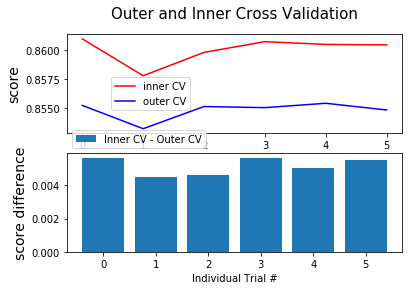

In [60]:
# Plot scores on each trial for nested and non-nested CV
plt.figure(figsize=(12,12))
plt.figure()
plt.subplot(211)
inner_scores_line, = plt.plot(inner_scores, color='r')
outer_line, = plt.plot(outer_scores, color='b')
plt.ylabel("score", fontsize="14")
plt.legend([inner_scores_line, outer_line],
           ["inner CV", "outer CV"],
           bbox_to_anchor=(0, .4, .5, 0))
plt.title("Outer and Inner Cross Validation",
          x=.5, y=1.1, fontsize="15")
# Plot bar chart of the difference.
plt.subplot(212)
difference_plot = plt.bar(range(NUM_TRIALS), score_difference)
plt.xlabel("Individual Trial #")
plt.legend([difference_plot],
           ["Inner CV - Outer CV"],
           bbox_to_anchor=(0, 1, .8, 0))
plt.ylabel("score difference", fontsize="14")
plt.show()

#### Stattistical difference between a change score and zero.
- This approach involves creating a change score from two variables, and then comparing the mean change score to zero, which will indicate whether any change accurred between the two time points for the original measures. If the mean change score is not significantly different from zero, no significant change ocurred. (https://libguides.library.kent.edu/SPSS/OneSampletTest)

In [61]:
from scipy import stats
difference = np.array(score_difference)
stats.ttest_1samp(difference, popmean=0.0)
# if p-value < 0.05 we cannont reject the null hypothesis. Therefore all experiments are statistically equivalent.

Ttest_1sampResult(statistic=24.278633433867732, pvalue=2.209636697585914e-06)

### PICK BETTER MODEL HERE!!

In [62]:
best_model = inner_models[2] # selección el modelo # 1
#best_model = pickle.load(open(TAG+"_inner_model_trial_0_.sav","rb")) 
print(best_model.get_params())

{'early_stopping': 'auto', 'l2_regularization': 0.8, 'learning_rate': 0.1, 'loss': 'binary_crossentropy', 'max_bins': 255, 'max_depth': 40, 'max_iter': 268, 'max_leaf_nodes': 40, 'min_samples_leaf': 70, 'monotonic_cst': None, 'n_iter_no_change': 10, 'random_state': 2, 'scoring': 'loss', 'tol': 1e-07, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [63]:
inner_cv = GroupKFold(n_splits = 5)
outer_cv = GroupKFold(n_splits = 8)

In [64]:
outer_cv_indexes = list(outer_cv.split(X_train_cv_final, 
                                           Y_train_cv, 
                                           inner_cv_groups))

In [65]:
inner_cv_groups1 = list(inner_cv.split(X_train_cv_final, 
                                           Y_train_cv, 
                                           inner_cv_groups)) 

In [66]:
#best model parameters
best_model.get_params()

{'early_stopping': 'auto',
 'l2_regularization': 0.8,
 'learning_rate': 0.1,
 'loss': 'binary_crossentropy',
 'max_bins': 255,
 'max_depth': 40,
 'max_iter': 268,
 'max_leaf_nodes': 40,
 'min_samples_leaf': 70,
 'monotonic_cst': None,
 'n_iter_no_change': 10,
 'random_state': 2,
 'scoring': 'loss',
 'tol': 1e-07,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

##### Feature importance with Permutation importance
We will show that the impurity-based feature importance can inflate the importance of numerical features.

Furthermore, the impurity-based feature importance of random forests suffers from being computed on statistics derived from the training dataset: the importances can be high even for features that are not predictive of the target variable, as long as the model has the capacity to use them to overfit.

This example shows how to use Permutation Importances as an alternative that can mitigate those limitations.
https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance.html#sphx-glr-auto-examples-inspection-plot-permutation-importance-py

#### PERMUTATION IMPORTANCE TRAIN SET

In [67]:
from sklearn.inspection import permutation_importance

In [ ]:
#from sklearn.inspection import permutation_importance
feature_importance = permutation_importance(best_model, 
                                            X_train_cv_final, 
                                            Y_train_cv, 
                                            n_repeats=5, 
                                            n_jobs=1, 
                                            random_state=1)

In [ ]:
sorted_idx = feature_importance.importances_mean.argsort()

fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot(feature_importance.importances[sorted_idx].T,
           vert=False, labels=X_train_cv_final.columns[sorted_idx])
ax.set_title("Permutation Importances (train set)")
fig.tight_layout()
plt.show()

#### PERMUTATION IMPORTANCE VALID TEST

In [ ]:
columns_val_ordered = X_train_cv_final.columns.tolist()

In [ ]:
feature_importance_val = permutation_importance(best_model, 
                                                X_validation_final[columns_val_ordered], 
                                                Y_validation, 
                                                n_repeats=5, 
                                                n_jobs=1, 
                                                random_state=1)

In [ ]:
sorted_idx_val = feature_importance_val.importances_mean.argsort()

fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot(feature_importance_val.importances[sorted_idx_val].T,
           vert=False, labels=X_validation_final.columns[sorted_idx_val])
ax.set_title("Permutation Importances (validation set)")
fig.tight_layout()
plt.show()

## TRAIN PREDICTIONS

In [68]:
#with predict_proba and without cv 
y_prob = best_model.predict_proba(X_train_cv_final)

### PLOT CLASSES TRAIN SET

In [69]:
y_result = Y_train_cv.to_frame().copy()
y_result["id_clte"]  = df_train_cv.id_clte
y_result["id_oblg"]  = df_train_cv.id_oblg
y_result["fecha"] = df_train_cv.fecha

In [70]:
y_result["y_score"] = y_prob[:,1]

Text(0.5, 1.1, 'Class Separation Training Set')

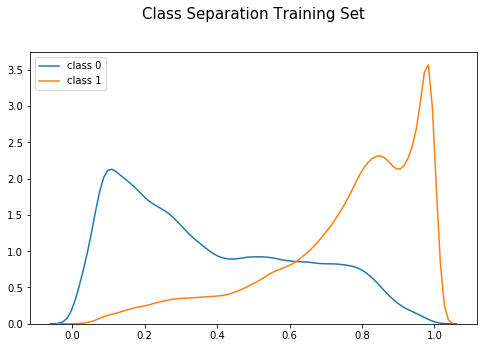

In [72]:
plt.figure(figsize=(8,5))
sns.kdeplot(y_result.y_score[y_result.propen_y_oblg == 0], label="class 0")
sns.kdeplot(y_result.y_score[y_result.propen_y_oblg == 1],label="class 1")
#plt.axvline(y_result.y_score[y_result.response_variable == 0].mean(),color = "black")
#plt.axvline(y_result.y_score[y_result.response_variable == 1].mean(),color = "red")
plt.title("Class Separation Training Set",x=.5, y=1.1, fontsize="15")

### CALIBRATION CURVE IN TRAIN SET

In [73]:
# reliability diagram - UNCALIBRATE
fop, mpv = calibration_curve(Y_train_cv, y_prob[:,1], n_bins=10, normalize=True)

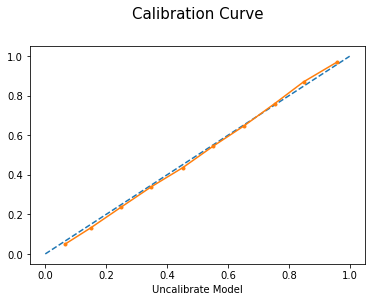

In [74]:
# plot perfectly calibrated
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot model reliability
pyplot.plot(mpv, fop, marker='.', label="uncalibrate")
pyplot.xlabel("Uncalibrate Model")
plt.title("Calibration Curve",
          x=.5, y=1.1, fontsize="15")
pyplot.show()

### THRESHOLD AUC TRAIN

In [75]:
from scipy import interpolate
from scipy.signal import savgol_filter
import heapq
fpr, tpr, thresh = metrics.roc_curve(Y_train_cv,y_result["y_score"])
tck_cost = interpolate.splrep(fpr, tpr, k=3, s=5)
spline_inter_cost = interpolate.splev(fpr, tck_cost, der=0)
first_der_cost = interpolate.splev(fpr, tck_cost, der=1)
second_der_cost = interpolate.splev(fpr, tck_cost, der=2)
curvature_cost = second_der_cost/(1+(first_der_cost)**2)**(3/2)

In [116]:
ind = heapq.nsmallest(77000, range(len(savgol_filter(curvature_cost, 11, 9, deriv=1))), 
                     savgol_filter(curvature_cost, 11, 9,deriv=1).take)

Text(0.5, 1.0, 'Costo de la matriz de confusión vs Threshold \n tn = 0.25, fp=0.5,  fn=2.0, tp=0.75')

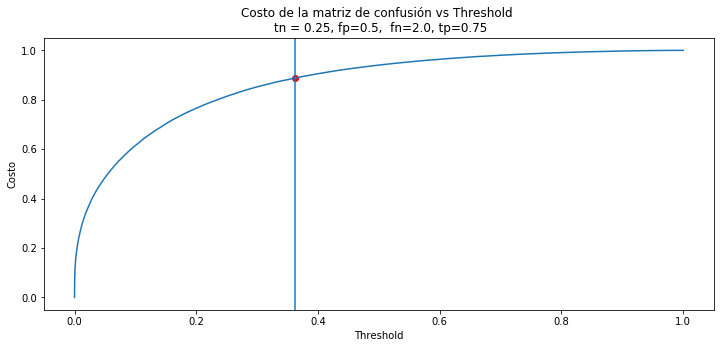

In [117]:
plt.figure(figsize=(12,5))
plt.plot(fpr, tpr)
plt.axvline(fpr[ind][-1])
plt.scatter(fpr[ind][-1], tpr[ind][-1], color="red")
plt.ylabel("Costo")
plt.xlabel("Threshold")
plt.title("Costo de la matriz de confusión vs Threshold \n tn = 0.25, fp=0.5,  fn=2.0, tp=0.75")

In [118]:
optimal_thresh_AUC_1 = thresh[ind][-1]

In [119]:
optimal_thresh_AUC_1

0.45520797491890685

In [122]:
from sklearn.metrics import *
print(f"accuracy_auc: {accuracy_score(y_result.propen_y_oblg, np.where(y_result.y_score >= optimal_thresh_AUC_1, 1,0))}")
print(f"recall_auc: {recall_score(y_result.propen_y_oblg, np.where(y_result.y_score >= optimal_thresh_AUC_1, 1,0))}")
print(f'Informedness: {balanced_accuracy_score(y_result["propen_y_oblg"], np.where(y_result["y_score"] >= optimal_thresh_AUC_1, 1, 0), adjusted=True)}')
print(f"confusion matrix: \n {confusion_matrix(y_result.propen_y_oblg, np.where(y_result.y_score >= optimal_thresh_AUC_1, 1,0))}")

accuracy_auc: 0.7899922303482216
recall_auc: 0.8879165739117894
Informedness: 0.525476849569209
confusion matrix: 
 [[130631  74261]
 [ 35748 283193]]


In [123]:
print(classification_report(y_result['propen_y_oblg'], np.where(y_result['y_score'] >= optimal_thresh_AUC_1, 1, 0)))

              precision    recall  f1-score   support

           0       0.79      0.64      0.70    204892
           1       0.79      0.89      0.84    318941

    accuracy                           0.79    523833
   macro avg       0.79      0.76      0.77    523833
weighted avg       0.79      0.79      0.79    523833



### THRESHOLD PRC TRAIN

In [124]:
def Find_Optimal_Cutoff_PRCAUC(target, predicted):
    """
        Optimal PR threshold based on F-Score max
    """
    pr, rc, threshold = precision_recall_curve(target, predicted)
    fscore = (2 * pr * rc) / (pr + rc)
    best_threshold = threshold[np.argmax(fscore)]
    return fscore, threshold, best_threshold

In [125]:
optimal_thresh_PRC = Find_Optimal_Cutoff_PRCAUC(y_result.propen_y_oblg, y_result.y_score)[-1]

In [126]:
optimal_thresh_PRC

0.43883080270928554

In [127]:
print(f"accuracy_prc: {accuracy_score(y_result.propen_y_oblg, np.where(y_result.y_score >= optimal_thresh_PRC, 1,0))}")
print(f"recall_prc: {recall_score(y_result.propen_y_oblg, np.where(y_result.y_score >= optimal_thresh_PRC, 1,0))}")
print(f'Informedness: {balanced_accuracy_score(y_result["propen_y_oblg"], np.where(y_result["y_score"] >= optimal_thresh_PRC, 1, 0), adjusted=True)}')
print(f"confusion matrix: \n {confusion_matrix(y_result.propen_y_oblg, np.where(y_result.y_score >= optimal_thresh_PRC, 1,0))}")

accuracy_prc: 0.7888143740466904
recall_prc: 0.8950558253720907
Informedness: 0.5184915866512037
confusion matrix: 
 [[127737  77155]
 [ 33471 285470]]


In [128]:
print(classification_report(y_result['propen_y_oblg'], np.where(y_result['y_score'] >= optimal_thresh_PRC, 1, 0)))

              precision    recall  f1-score   support

           0       0.79      0.62      0.70    204892
           1       0.79      0.90      0.84    318941

    accuracy                           0.79    523833
   macro avg       0.79      0.76      0.77    523833
weighted avg       0.79      0.79      0.78    523833



In [129]:
y_result["y_label_PRC"] = y_result.y_score.apply(lambda x: 1 if x >= optimal_thresh_PRC else 0)
y_result["y_label_AUC"] = y_result.y_score.apply(lambda x: 1 if x >= optimal_thresh_AUC_1 else 0)
y_result["set_type"] = "train_cv"

### TEST PREDICTIONS

In [130]:
#IF WE HAVE ALREADY HEREr
df_oot = df_test

In [131]:
df_oot.shape

(66372, 226)

In [132]:
y_oot = df_oot.propen_y_oblg

In [133]:
oot_groups_gkf = df_oot.fecha
y_result_oot = y_oot.to_frame().copy()

In [134]:
x_oot_cols = X_train_cv_final.columns.tolist()

In [135]:
X_oot = df_oot[x_oot_cols]

In [136]:
X_oot_final = X_oot.copy()

In [137]:
X_oot_final.shape

(66372, 17)

### DO PREDICTION

In [138]:
#predict_proba without cv
y_prob_oot = best_model.predict_proba(X_oot_final)

In [139]:
y_result_oot["y_score"] = y_prob_oot[:,1]

In [140]:
y_oot_label = np.where(y_result_oot.y_score >= optimal_thresh_AUC_1, 1,0)

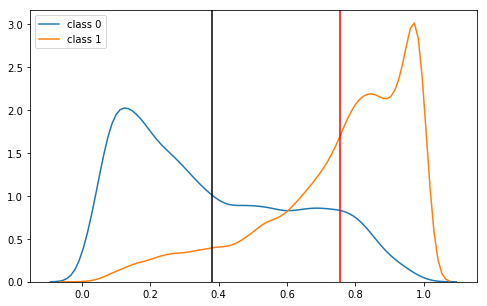

In [141]:
plt.figure(figsize=(8,5))
sns.kdeplot(y_result_oot.y_score[y_result_oot.propen_y_oblg == 0], label="class 0")
sns.kdeplot(y_result_oot.y_score[y_result_oot.propen_y_oblg == 1],label="class 1")
plt.axvline(y_result_oot.y_score[y_result_oot.propen_y_oblg == 0].mean(),color = "black")
plt.axvline(y_result_oot.y_score[y_result_oot.propen_y_oblg == 1].mean(),color = "red")

### TEST THRESHOLD AUC

In [142]:
from sklearn.metrics import *
print(f"accuracy_auc: {accuracy_score(y_result_oot.propen_y_oblg, np.where(y_result_oot.y_score >= optimal_thresh_AUC_1, 1,0))}")
print(f"recall_auc: {recall_score(y_result_oot.propen_y_oblg, np.where(y_result_oot.y_score >= optimal_thresh_AUC_1, 1,0))}")
print(f'Informedness: {balanced_accuracy_score(y_result_oot["propen_y_oblg"], np.where(y_result_oot["y_score"] >= optimal_thresh_AUC_1, 1, 0), adjusted=True)}')
print(f"confusion matrix: \n {confusion_matrix(y_result_oot.propen_y_oblg, np.where(y_result_oot.y_score >= optimal_thresh_AUC_1, 1,0))}")

accuracy_auc: 0.7863104923763032
recall_auc: 0.8848691581804148
Informedness: 0.5201471161337896
confusion matrix: 
 [[16650  9559]
 [ 4624 35539]]


In [143]:
print(classification_report(y_result_oot['propen_y_oblg'], np.where(y_result_oot['y_score'] >= optimal_thresh_AUC_1, 1, 0)))

              precision    recall  f1-score   support

           0       0.78      0.64      0.70     26209
           1       0.79      0.88      0.83     40163

    accuracy                           0.79     66372
   macro avg       0.79      0.76      0.77     66372
weighted avg       0.79      0.79      0.78     66372



### TEST THRESHOLD PRC

In [144]:
print(f"accuracy_prc: {accuracy_score(y_result_oot.propen_y_oblg, np.where(y_result_oot.y_score >= optimal_thresh_PRC, 1,0))}") 
print(f"recall_prc: {recall_score(y_result_oot.propen_y_oblg, np.where(y_result_oot.y_score >= optimal_thresh_PRC, 1,0))}")
print(f'Informedness_prc: {balanced_accuracy_score(y_result_oot["propen_y_oblg"], np.where(y_result_oot["y_score"] >= optimal_thresh_PRC, 1, 0), adjusted=True)}')
print(f"confusion matrix_prc: \n {confusion_matrix(y_result_oot.propen_y_oblg, np.where(y_result_oot.y_score >= optimal_thresh_PRC, 1,0))}")

accuracy_prc: 0.7846983667811728
recall_prc: 0.8917162562557578
Informedness_prc: 0.512419068266899
confusion matrix_prc: 
 [[16268  9941]
 [ 4349 35814]]


In [145]:
print(classification_report(y_result_oot['propen_y_oblg'], np.where(y_result_oot['y_score'] >= optimal_thresh_PRC, 1, 0)))

              precision    recall  f1-score   support

           0       0.79      0.62      0.69     26209
           1       0.78      0.89      0.83     40163

    accuracy                           0.78     66372
   macro avg       0.79      0.76      0.76     66372
weighted avg       0.79      0.78      0.78     66372



## PERMUTATION IMPORTANCE IN TEST SET

In [146]:
feature_importance_oot = permutation_importance(best_model, 
                                                X_oot[columns_val_ordered], 
                                                y_oot_label , 
                                                n_repeats=5, 
                                                n_jobs=1, 
                                                random_state=1)

NameError: name 'columns_val_ordered' is not defined

In [ ]:
sorted_idx_oot = feature_importance_oot.importances_mean.argsort()

fig, ax = plt.subplots(figsize=(8,5))
ax.boxplot(feature_importance_oot.importances[sorted_idx_oot].T,
           vert=False, labels=X_oot[columns_val_ordered].columns[sorted_idx_oot])
ax.set_title("Permutation Importances (OOT set)")
fig.tight_layout()
plt.show()

# VALIDATION SET PREDICTION

In [147]:
y_result_valid = df_validation[["id_clte","id_oblg", "fecha", "propen_y_oblg"]].copy()

In [148]:
#CHECK DATES
y_result.fecha.unique()

array(['2018-03-01T00:00:00.000000000', '2019-06-01T00:00:00.000000000',
       '2019-04-01T00:00:00.000000000', '2019-10-01T00:00:00.000000000',
       '2019-07-01T00:00:00.000000000', '2018-10-01T00:00:00.000000000',
       '2018-11-01T00:00:00.000000000', '2019-01-01T00:00:00.000000000',
       '2018-12-01T00:00:00.000000000', '2019-11-01T00:00:00.000000000',
       '2018-08-01T00:00:00.000000000', '2020-01-01T00:00:00.000000000',
       '2019-05-01T00:00:00.000000000', '2019-03-01T00:00:00.000000000',
       '2018-06-01T00:00:00.000000000', '2020-08-01T00:00:00.000000000',
       '2020-02-01T00:00:00.000000000', '2019-12-01T00:00:00.000000000',
       '2020-11-01T00:00:00.000000000', '2018-04-01T00:00:00.000000000',
       '2019-08-01T00:00:00.000000000', '2018-05-01T00:00:00.000000000',
       '2019-09-01T00:00:00.000000000', '2020-06-01T00:00:00.000000000',
       '2019-02-01T00:00:00.000000000', '2018-07-01T00:00:00.000000000',
       '2020-10-01T00:00:00.000000000', '2020-05-01

In [149]:
y_result_valid.fecha.unique()

array(['2019-04-01T00:00:00.000000000', '2019-05-01T00:00:00.000000000',
       '2019-03-01T00:00:00.000000000', '2020-01-01T00:00:00.000000000',
       '2019-10-01T00:00:00.000000000', '2018-10-01T00:00:00.000000000',
       '2018-03-01T00:00:00.000000000', '2018-06-01T00:00:00.000000000',
       '2018-08-01T00:00:00.000000000', '2018-09-01T00:00:00.000000000',
       '2018-05-01T00:00:00.000000000', '2019-12-01T00:00:00.000000000',
       '2019-11-01T00:00:00.000000000', '2019-02-01T00:00:00.000000000',
       '2020-05-01T00:00:00.000000000', '2019-09-01T00:00:00.000000000',
       '2018-12-01T00:00:00.000000000', '2019-08-01T00:00:00.000000000',
       '2020-10-01T00:00:00.000000000', '2019-01-01T00:00:00.000000000',
       '2020-11-01T00:00:00.000000000', '2020-03-01T00:00:00.000000000',
       '2020-04-01T00:00:00.000000000', '2019-07-01T00:00:00.000000000',
       '2018-11-01T00:00:00.000000000', '2018-04-01T00:00:00.000000000',
       '2020-02-01T00:00:00.000000000', '2020-06-01

In [150]:
#predict_proba without cv
y_prob_valid = best_model.predict_proba(X_validation_final)

In [151]:
X_validation_final.head(5)

,saldok_oblg,madurez_oblg,altura_mora_clte,descuento_directo_oblg,marca_huesped_oblg,dias_hasta_proximo_pago,pago_minimo_oblg,flg_gestion_rpc_oblg,ciclo_facturacion_oblg,valor_desembolso_oblg,pago_mes_oblg,gestiones_tek_mes_oblg,marca_rodamiento_oblg,meses_hasta_vencimiento_oblg,razon_pago_oblg,avg_hist_razon_pago_oblg_3m,avg_hist_pago_mes_oblg_3m
2,5421.62,191,1,0,0,30,124.2,0,30.0,16250.37,139.64,0,1,-71.0,1.123323,-332.084878,113.906667
10,1979.96,32,17,0,0,-9999,61.0,0,15.0,4154.80,91.65,0,0,-42.0,1.494355,1.658602,101.833333
13,279.59,44,15,0,1,-9999,20.0,0,15.0,1200.00,40.00,0,0,-21.0,1.952381,-331.698413,26.666667
21,3864.97,62,154,1,0,-9999,175.0,0,15.0,13300.00,350.00,3,0,-24.0,1.994318,1.662879,291.666667
23,5562.79,55,27,0,0,5,113.0,0,5.0,7712.21,0.00,0,1,-76.0,-999.000000,-332.004240,112.850000


In [152]:
y_result_valid["y_score"] = y_prob_valid[:,1]
y_result_valid["set_type"] = "valid"

In [153]:
y_result_valid["y_label_PRC"] = np.where(y_result_valid.y_score >= optimal_thresh_PRC, 1,0)
y_result_valid["y_label_AUC"] = np.where(y_result_valid.y_score >= optimal_thresh_AUC_1, 1,0)

### THRESHOLD AUC VALIDATION SET

In [154]:
print(f"accuracy_prc: {accuracy_score(y_result_valid.propen_y_oblg, np.where(y_result_valid.y_score >= optimal_thresh_PRC, 1,0))}") 
print(f"recall_AUC: {recall_score(y_result_valid.propen_y_oblg, np.where(y_result_valid.y_score >= optimal_thresh_AUC_1, 1,0))}")
print(f'Informedness_AUC: {balanced_accuracy_score(y_result_valid["propen_y_oblg"], np.where(y_result_valid["y_score"] >= optimal_thresh_AUC_1, 1, 0), adjusted=True)}')
print(f"confusion matrix AUC: \n {confusion_matrix(y_result_valid.propen_y_oblg, np.where(y_result_valid.y_score >= optimal_thresh_AUC_1, 1,0))}")

accuracy_prc: 0.784330154090388
recall_AUC: 0.8822460401049088
Informedness_AUC: 0.5175462404539037
confusion matrix AUC: 
 [[39320 22572]
 [11404 85442]]


In [155]:
print(classification_report(y_result['propen_y_oblg'], np.where(y_result['y_score'] >= optimal_thresh_PRC, 1, 0)))

              precision    recall  f1-score   support

           0       0.79      0.62      0.70    204892
           1       0.79      0.90      0.84    318941

    accuracy                           0.79    523833
   macro avg       0.79      0.76      0.77    523833
weighted avg       0.79      0.79      0.78    523833



### THRESHOLD PRC VALIDATION SET

In [156]:
print(f"accuracy_PRC: {accuracy_score(y_result_valid.propen_y_oblg, np.where(y_result_valid.y_score >= optimal_thresh_PRC, 1,0))}")
print(f"recall_PRC: {recall_score(y_result_valid.propen_y_oblg, np.where(y_result_valid.y_score >= optimal_thresh_PRC, 1,0))}")
print(f'Informedness_PRC: {balanced_accuracy_score(y_result_valid["propen_y_oblg"], np.where(y_result_valid["y_score"] >= optimal_thresh_PRC, 1, 0), adjusted=True)}')
print(f"confusion matrix PRC: \n {confusion_matrix(y_result_valid.propen_y_oblg, np.where(y_result_valid.y_score >= optimal_thresh_PRC, 1,0))}")

accuracy_PRC: 0.784330154090388
recall_PRC: 0.8893294508807797
Informedness_PRC: 0.509361118947735
confusion matrix PRC: 
 [[38375 23517]
 [10718 86128]]


## PICK FINAL RESULTS FOR TRAIN/VALID/TEST

In [157]:
y_result.head()

,propen_y_oblg,id_clte,id_oblg,fecha,y_score,y_label_PRC,y_label_AUC,set_type
0,0,281130,4236590000111805,2018-03-01,0.496638,1,1,train_cv
1,1,465610,5341250000283356,2019-06-01,0.253945,0,0,train_cv
3,0,98877117,421414,2019-04-01,0.657720,1,1,train_cv
4,0,98862045,476247,2019-10-01,0.088021,0,0,train_cv
5,1,548535,386121,2019-07-01,0.783144,1,1,train_cv


In [158]:
#train
result_train_cv = y_result[['id_clte','id_oblg','fecha', 'propen_y_oblg', 'y_score']]

In [159]:
result_train_cv.head(5)

,id_clte,id_oblg,fecha,propen_y_oblg,y_score
0,281130,4236590000111805,2018-03-01,0,0.496638
1,465610,5341250000283356,2019-06-01,1,0.253945
3,98877117,421414,2019-04-01,0,0.657720
4,98862045,476247,2019-10-01,0,0.088021
5,548535,386121,2019-07-01,1,0.783144


In [160]:
#validación 
result_validation = y_result_valid[['id_clte','id_oblg','fecha', 'propen_y_oblg', 'y_score']]

In [161]:
result_validation.head(5)

,id_clte,id_oblg,fecha,propen_y_oblg,y_score
2,337020,94892,2019-04-01,1,0.981033
10,61818,702346,2019-05-01,1,0.967873
13,55657,632794,2019-03-01,1,0.963383
21,54090,613796,2020-01-01,1,0.912603
23,98832057,388429,2019-10-01,1,0.669704


In [162]:
##oot
result_oot = pd.concat([df_oot[["id_clte","id_oblg","fecha"]], y_result_oot], axis=1)

In [163]:
result_oot.head(5)

,id_clte,id_oblg,fecha,propen_y_oblg,y_score
8,98559834,4525205000281348,2018-09-01,0,0.310790
43,75374,845907,2019-07-01,1,0.986161
53,98502252,429014,2020-09-01,0,0.393278
62,22989,689738,2019-04-01,0,0.429617
72,98903458,437618,2018-08-01,1,0.804829


## PERFORMANCE OF MODEL

In [164]:
#new columns for y_label(auc,prc) 
result_oot["y_label_AUC"] = np.where(y_result_oot.y_score >= optimal_thresh_AUC_1, 1,0)
result_oot["y_label_PRC"] = np.where(y_result_oot.y_score >= optimal_thresh_PRC, 1,0)
result_oot["set_type"] = "oot"

In [165]:
result_oot.head(5)

,id_clte,id_oblg,fecha,propen_y_oblg,y_score,y_label_AUC,y_label_PRC,set_type
8,98559834,4525205000281348,2018-09-01,0,0.310790,0,0,oot
43,75374,845907,2019-07-01,1,0.986161,1,1,oot
53,98502252,429014,2020-09-01,0,0.393278,0,0,oot
62,22989,689738,2019-04-01,0,0.429617,0,0,oot
72,98903458,437618,2018-08-01,1,0.804829,1,1,oot


In [166]:
# auc by sets
auc_x_mes_oot = result_oot.groupby("fecha").apply(lambda x: roc_auc_score(x["propen_y_oblg"],x["y_score"])) 
auc_x_mes_train = result_train_cv.groupby("fecha").apply(lambda x: roc_auc_score(x["propen_y_oblg"],x["y_score"]))
auc_x_mes_valid = result_validation.groupby("fecha").apply(lambda x: roc_auc_score(x["propen_y_oblg"],x["y_score"]))

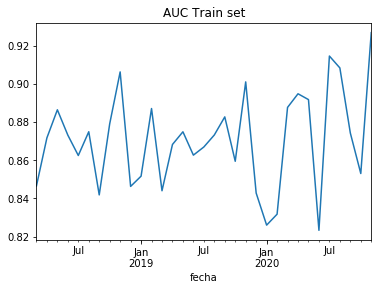

In [167]:
auc_x_mes_train.plot(title="AUC Train set")

In [168]:
auc_x_mes_train

fecha
2018-03-01    0.846595
2018-04-01    0.871726
2018-05-01    0.886404
2018-06-01    0.873144
2018-07-01    0.862500
2018-08-01    0.874925
2018-09-01    0.841881
2018-10-01    0.879035
2018-11-01    0.906220
2018-12-01    0.846321
2019-01-01    0.851678
2019-02-01    0.887067
2019-03-01    0.844048
2019-04-01    0.868257
2019-05-01    0.874897
2019-06-01    0.862683
2019-07-01    0.866949
2019-08-01    0.873227
2019-09-01    0.882696
2019-10-01    0.859470
2019-11-01    0.901002
2019-12-01    0.842851
2020-01-01    0.826061
2020-02-01    0.831789
2020-03-01    0.887655
2020-04-01    0.894784
2020-05-01    0.891737
2020-06-01    0.823350
2020-07-01    0.914524
2020-08-01    0.908313
2020-09-01    0.874272
2020-10-01    0.853067
2020-11-01    0.926766
dtype: float64

In [169]:
roc_auc_score(result_train_cv.propen_y_oblg, result_train_cv.y_score)

0.8677156633519051

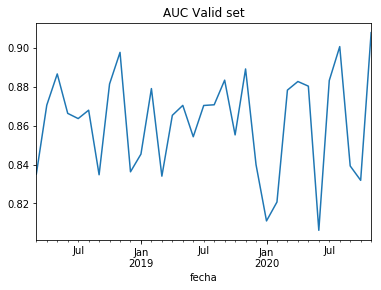

In [170]:
auc_x_mes_valid.plot(title="AUC Valid set")

In [171]:
auc_x_mes_valid

fecha
2018-03-01    0.835101
2018-04-01    0.870549
2018-05-01    0.886580
2018-06-01    0.866309
2018-07-01    0.863631
2018-08-01    0.867937
2018-09-01    0.834737
2018-10-01    0.881432
2018-11-01    0.897666
2018-12-01    0.836255
2019-01-01    0.845361
2019-02-01    0.879053
2019-03-01    0.834020
2019-04-01    0.865299
2019-05-01    0.870412
2019-06-01    0.854283
2019-07-01    0.870363
2019-08-01    0.870724
2019-09-01    0.883383
2019-10-01    0.855239
2019-11-01    0.889146
2019-12-01    0.839902
2020-01-01    0.811004
2020-02-01    0.820722
2020-03-01    0.878265
2020-04-01    0.882689
2020-05-01    0.880304
2020-06-01    0.806174
2020-07-01    0.883214
2020-08-01    0.900636
2020-09-01    0.839269
2020-10-01    0.831873
2020-11-01    0.907813
dtype: float64

In [172]:
roc_auc_score(result_validation.propen_y_oblg, result_validation.y_score)

0.8615683250809842

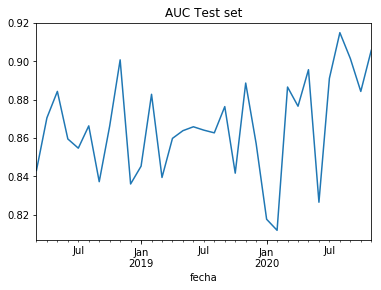

In [173]:
auc_x_mes_oot.plot(title="AUC Test set")

In [174]:
auc_x_mes_oot

fecha
2018-03-01    0.843152
2018-04-01    0.870488
2018-05-01    0.884243
2018-06-01    0.859508
2018-07-01    0.854718
2018-08-01    0.866314
2018-09-01    0.837292
2018-10-01    0.866251
2018-11-01    0.900638
2018-12-01    0.836098
2019-01-01    0.845350
2019-02-01    0.882728
2019-03-01    0.839484
2019-04-01    0.859806
2019-05-01    0.863817
2019-06-01    0.865847
2019-07-01    0.864091
2019-08-01    0.862688
2019-09-01    0.876333
2019-10-01    0.841728
2019-11-01    0.888576
2019-12-01    0.857044
2020-01-01    0.817750
2020-02-01    0.812006
2020-03-01    0.886512
2020-04-01    0.876534
2020-05-01    0.895526
2020-06-01    0.826612
2020-07-01    0.891037
2020-08-01    0.914789
2020-09-01    0.901350
2020-10-01    0.884217
2020-11-01    0.905593
dtype: float64

In [175]:
roc_auc_score(result_oot.propen_y_oblg, result_oot.y_score)

0.8613222391979438

In [176]:
oot_dates = result_oot.fecha.unique()
oot_dates.sort()
print(oot_dates)

['2018-03-01T00:00:00.000000000' '2018-04-01T00:00:00.000000000'
 '2018-05-01T00:00:00.000000000' '2018-06-01T00:00:00.000000000'
 '2018-07-01T00:00:00.000000000' '2018-08-01T00:00:00.000000000'
 '2018-09-01T00:00:00.000000000' '2018-10-01T00:00:00.000000000'
 '2018-11-01T00:00:00.000000000' '2018-12-01T00:00:00.000000000'
 '2019-01-01T00:00:00.000000000' '2019-02-01T00:00:00.000000000'
 '2019-03-01T00:00:00.000000000' '2019-04-01T00:00:00.000000000'
 '2019-05-01T00:00:00.000000000' '2019-06-01T00:00:00.000000000'
 '2019-07-01T00:00:00.000000000' '2019-08-01T00:00:00.000000000'
 '2019-09-01T00:00:00.000000000' '2019-10-01T00:00:00.000000000'
 '2019-11-01T00:00:00.000000000' '2019-12-01T00:00:00.000000000'
 '2020-01-01T00:00:00.000000000' '2020-02-01T00:00:00.000000000'
 '2020-03-01T00:00:00.000000000' '2020-04-01T00:00:00.000000000'
 '2020-05-01T00:00:00.000000000' '2020-06-01T00:00:00.000000000'
 '2020-07-01T00:00:00.000000000' '2020-08-01T00:00:00.000000000'
 '2020-09-01T00:00:00.000

In [177]:
train_dates = result_train_cv.fecha.unique()
train_dates.sort()
print(train_dates)

['2018-03-01T00:00:00.000000000' '2018-04-01T00:00:00.000000000'
 '2018-05-01T00:00:00.000000000' '2018-06-01T00:00:00.000000000'
 '2018-07-01T00:00:00.000000000' '2018-08-01T00:00:00.000000000'
 '2018-09-01T00:00:00.000000000' '2018-10-01T00:00:00.000000000'
 '2018-11-01T00:00:00.000000000' '2018-12-01T00:00:00.000000000'
 '2019-01-01T00:00:00.000000000' '2019-02-01T00:00:00.000000000'
 '2019-03-01T00:00:00.000000000' '2019-04-01T00:00:00.000000000'
 '2019-05-01T00:00:00.000000000' '2019-06-01T00:00:00.000000000'
 '2019-07-01T00:00:00.000000000' '2019-08-01T00:00:00.000000000'
 '2019-09-01T00:00:00.000000000' '2019-10-01T00:00:00.000000000'
 '2019-11-01T00:00:00.000000000' '2019-12-01T00:00:00.000000000'
 '2020-01-01T00:00:00.000000000' '2020-02-01T00:00:00.000000000'
 '2020-03-01T00:00:00.000000000' '2020-04-01T00:00:00.000000000'
 '2020-05-01T00:00:00.000000000' '2020-06-01T00:00:00.000000000'
 '2020-07-01T00:00:00.000000000' '2020-08-01T00:00:00.000000000'
 '2020-09-01T00:00:00.000

In [178]:
validation_dates = result_validation.fecha.unique()
validation_dates.sort()
print(validation_dates)

['2018-03-01T00:00:00.000000000' '2018-04-01T00:00:00.000000000'
 '2018-05-01T00:00:00.000000000' '2018-06-01T00:00:00.000000000'
 '2018-07-01T00:00:00.000000000' '2018-08-01T00:00:00.000000000'
 '2018-09-01T00:00:00.000000000' '2018-10-01T00:00:00.000000000'
 '2018-11-01T00:00:00.000000000' '2018-12-01T00:00:00.000000000'
 '2019-01-01T00:00:00.000000000' '2019-02-01T00:00:00.000000000'
 '2019-03-01T00:00:00.000000000' '2019-04-01T00:00:00.000000000'
 '2019-05-01T00:00:00.000000000' '2019-06-01T00:00:00.000000000'
 '2019-07-01T00:00:00.000000000' '2019-08-01T00:00:00.000000000'
 '2019-09-01T00:00:00.000000000' '2019-10-01T00:00:00.000000000'
 '2019-11-01T00:00:00.000000000' '2019-12-01T00:00:00.000000000'
 '2020-01-01T00:00:00.000000000' '2020-02-01T00:00:00.000000000'
 '2020-03-01T00:00:00.000000000' '2020-04-01T00:00:00.000000000'
 '2020-05-01T00:00:00.000000000' '2020-06-01T00:00:00.000000000'
 '2020-07-01T00:00:00.000000000' '2020-08-01T00:00:00.000000000'
 '2020-09-01T00:00:00.000

### AUC BY DATE TRAIN/VALID/TEST

In [179]:
#union train test-valid test
auc_x_mess = pd.concat([auc_x_mes_train, auc_x_mes_valid]).to_frame().reset_index()
auc_x_mess.set_index("fecha", inplace=True)

In [180]:
auc_x_mes_all = pd.concat([result_train_cv,result_validation, result_oot.drop(['set_type', 'y_label_AUC', 'y_label_PRC'],axis=1)], 
                          axis=0).groupby("fecha").apply(lambda x: roc_auc_score(x["propen_y_oblg"],x["y_score"]))

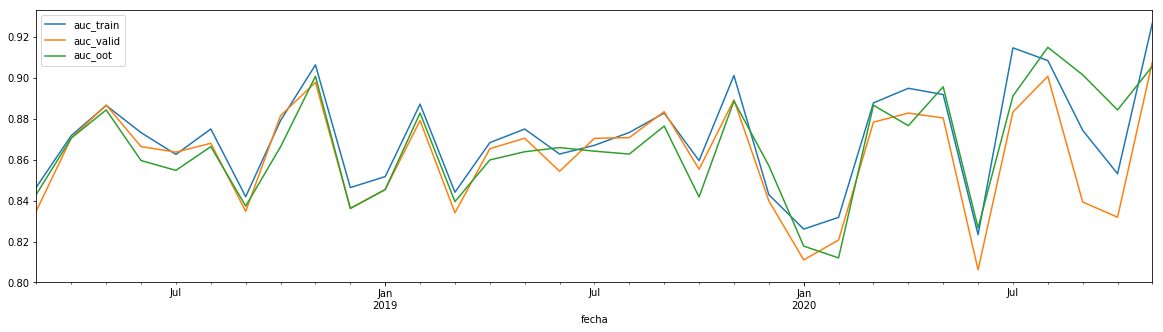

In [182]:
auc_x_mes_train.plot(figsize=(20,5), label="auc_train")
#plt.axhline(auc_x_mes_train.mean(), linestyle="-.", color="blue", label="train mean")
auc_x_mes_valid.plot(figsize=(20,5), label="auc_valid")
#plt.axhline(auc_x_mes_valid.mean(), linestyle="-.", color="green", label="valid mean")
auc_x_mes_oot.plot(figsize=(20,5), label="auc_oot")
#plt.axhline(auc_x_mes_oot.mean(), linestyle="-.", color="green", label="oot mean")
plt.legend()

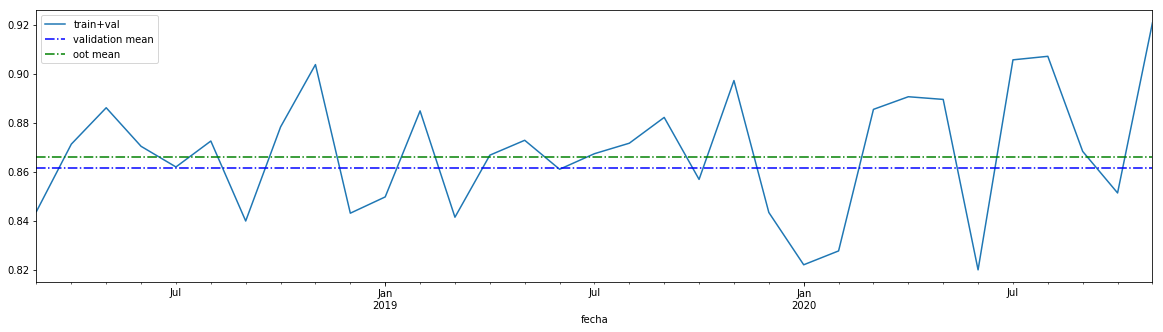

In [183]:
auc_x_mes_all.plot(figsize=(20,5), label="train+val")
#plt.axvline("2018-08-01", linestyle="--", color="red", label="Corte 2018-08")
plt.axhline(auc_x_mes_valid.mean(), linestyle="-.", color="blue", label="validation mean")
plt.axhline(auc_x_mes_oot.mean(), linestyle="-.", color="green", label="oot mean")

#auc_x_mes_oot.plot(figsize=(20,5), label="oot")
#auc_x_mes_train.plot(figsize=(20,5), label="train_cv")
#auc_x_mes_valid.plot(figsize=(20,5), label="validation")
#plt.axhline(auc_x_mes_train.mean(), linestyle="-.", label="mean")
#plt.axhline(auc_x_mes_train.mean(), linestyle="-.", label="mean", color="blue")
#plt.axhline(auc_x_mes_oot.mean(), linestyle="-.", label="mean", color="red")

#plt.axhline(auc_x_mes_train.mean() + 2*auc_x_mes_train.std(), linestyle="--", label="+ 2 x std")
#plt.axhline(auc_x_mes_train.mean() - 2*auc_x_mes_train.std(), linestyle="--", label="- 2 x std", color="red")
#plt.tight_layout()
plt.legend()

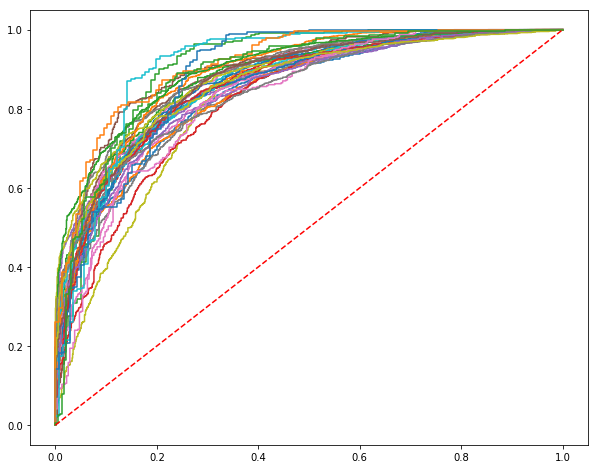

In [184]:
plt.figure(figsize=(10,8))

for f in result_oot.fecha.unique():
    fpr, tpr, _ = roc_curve(result_oot[result_oot.fecha == f].propen_y_oblg, result_oot[result_oot.fecha == f].y_score)
    plt.plot(fpr, tpr, label=str(f))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
#plt.legend()

In [185]:
auc_ts = result_oot.groupby("fecha").apply(lambda x: roc_auc_score(x["propen_y_oblg"],x["y_score"]))
auc_ts

fecha
2018-03-01    0.843152
2018-04-01    0.870488
2018-05-01    0.884243
2018-06-01    0.859508
2018-07-01    0.854718
2018-08-01    0.866314
2018-09-01    0.837292
2018-10-01    0.866251
2018-11-01    0.900638
2018-12-01    0.836098
2019-01-01    0.845350
2019-02-01    0.882728
2019-03-01    0.839484
2019-04-01    0.859806
2019-05-01    0.863817
2019-06-01    0.865847
2019-07-01    0.864091
2019-08-01    0.862688
2019-09-01    0.876333
2019-10-01    0.841728
2019-11-01    0.888576
2019-12-01    0.857044
2020-01-01    0.817750
2020-02-01    0.812006
2020-03-01    0.886512
2020-04-01    0.876534
2020-05-01    0.895526
2020-06-01    0.826612
2020-07-01    0.891037
2020-08-01    0.914789
2020-09-01    0.901350
2020-10-01    0.884217
2020-11-01    0.905593
dtype: float64

In [186]:
from scipy.optimize import curve_fit
def linear(x, a, b):
    return a*x + b
fit_params, _ = curve_fit(linear, np.arange(auc_ts.shape[0]), auc_ts.values)

In [187]:
decay = list()
max_range = 25
for i in range(0,max_range):
    decay.append(linear(i, *fit_params))

In [188]:
auc_ts_df = pd.DataFrame(auc_ts.values, columns=["auc predicted"])
auc_ts_df["date"] = pd.date_range("2020-01-01",periods= len(auc_ts_df), freq="1M")
auc_ts_df.set_index("date", inplace=True)

In [189]:
auc_decay = pd.DataFrame(decay, columns=["auc fit decay"])
auc_decay["date"] = pd.date_range("2020-01-01", periods=max_range, freq="1M")
auc_decay.set_index("date", inplace=True)

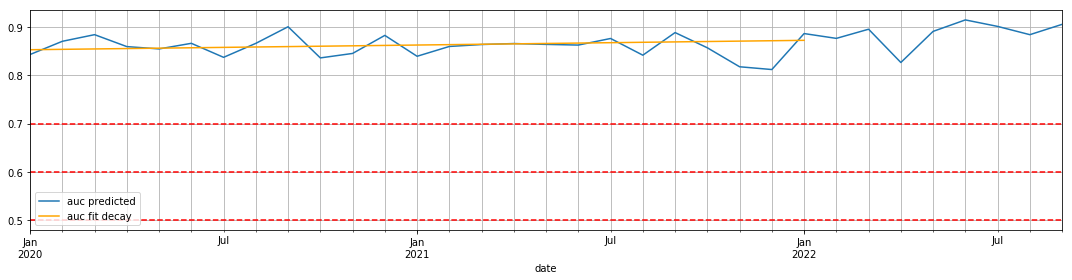

In [190]:
import matplotlib.dates as dates

ax = auc_ts_df.plot(figsize=(15,4))
auc_decay.plot(ax = ax, color="orange")
plt.axhline(0.7, color = "red", linestyle="--");
plt.axhline(0.6, color = "red", linestyle="--");
plt.axhline(0.5, color = "red", linestyle="--");
ax.xaxis.grid(True, which="minor")
ax.yaxis.grid()
plt.tight_layout()

In [191]:
perc_population_real = result_oot.groupby("fecha").propen_y_oblg.agg(["sum", "count"])
perc_population_real["percent_rendimiento"] = (100* perc_population_real["sum"]/perc_population_real["count"])

In [192]:
perc_population_pred = result_oot.groupby("fecha").y_label_AUC.agg(["sum", "count"])
perc_population_pred["percent_rendimiento"] = (100* perc_population_pred["sum"]/perc_population_pred["count"])

In [193]:
population_result = perc_population_real.join(perc_population_pred, lsuffix="_real", rsuffix ="_pred")

In [194]:
population_result

,sum_real,count_real,percent_rendimiento_real,sum_pred,count_pred,percent_rendimiento_pred
fecha,,,,,,
2018-03-01,1317,2287,57.586358,1531,2287,66.943594
2018-04-01,1728,2715,63.646409,2005,2715,73.848987
2018-05-01,1880,2880,65.277778,2143,2880,74.409722
2018-06-01,1612,2603,61.928544,1873,2603,71.955436
2018-07-01,1697,2683,63.250093,1990,2683,74.170704
2018-08-01,1662,2682,61.968680,1906,2682,71.066368
2018-09-01,1391,2498,55.684548,1619,2498,64.811849
2018-10-01,1622,2779,58.366319,1989,2779,71.572508
2018-11-01,1997,2918,68.437286,2139,2918,73.303633


In [195]:
population_result["total_difference"] = population_result["percent_rendimiento_pred"]-population_result["percent_rendimiento_real"]

In [197]:
auc_x_mes_all = pd.concat([result_train_cv,result_validation, result_oot], axis=0).groupby("fecha").apply(lambda x: roc_auc_score(x["propen_y_oblg"],x["y_score"]))

In [198]:
population_result

,sum_real,count_real,percent_rendimiento_real,sum_pred,count_pred,percent_rendimiento_pred,total_difference
fecha,,,,,,,
2018-03-01,1317,2287,57.586358,1531,2287,66.943594,9.357237
2018-04-01,1728,2715,63.646409,2005,2715,73.848987,10.202578
2018-05-01,1880,2880,65.277778,2143,2880,74.409722,9.131944
2018-06-01,1612,2603,61.928544,1873,2603,71.955436,10.026892
2018-07-01,1697,2683,63.250093,1990,2683,74.170704,10.920611
2018-08-01,1662,2682,61.968680,1906,2682,71.066368,9.097688
2018-09-01,1391,2498,55.684548,1619,2498,64.811849,9.127302
2018-10-01,1622,2779,58.366319,1989,2779,71.572508,13.206189
2018-11-01,1997,2918,68.437286,2139,2918,73.303633,4.866347


In [199]:
print("difference = {} +/- {}".format(population_result.total_difference.mean(), population_result.total_difference.std()))

difference = 5.750437120018188 +/- 6.2355852246494505


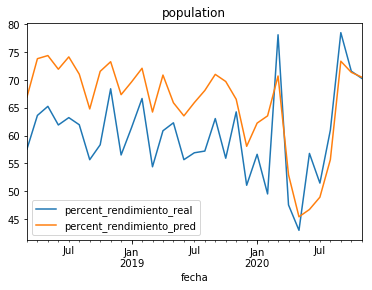

In [200]:
population_result[['percent_rendimiento_real','percent_rendimiento_pred']].plot(title="population")

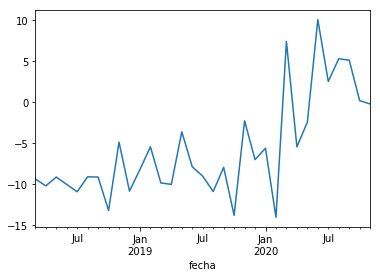

In [201]:
(population_result['percent_rendimiento_real']-population_result['percent_rendimiento_pred']).plot()

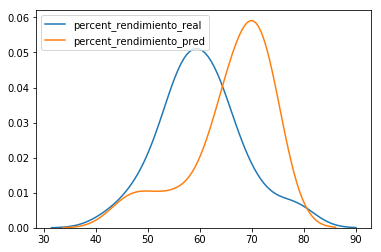

In [202]:
sns.kdeplot(population_result["percent_rendimiento_real"])
sns.kdeplot(population_result["percent_rendimiento_pred"])

In [203]:
from scipy.stats import ks_2samp

In [204]:
x = population_result["percent_rendimiento_real"]
y = population_result["percent_rendimiento_pred"]

In [205]:
ks_2samp(x, y)

Ks_2sampResult(statistic=0.5151515151515151, pvalue=0.00023697738528255033)

Results can be interpreted as following:

You can either compare the statistic value given by python to the KS-test critical value table according to your sample size. When statistic value is higher than the critical value, the two distributions are different.

Or you can compare the p-value to a level of significance a, usually a=0.05 or 0.01 (you decide, the lower a is, the more significant). If p-value is lower than a, then it is very probable that the two distributions are different.

## FINAL RESULT AND TABLE TO COMPARE WITH RESPONSE REAL VARIABLE

In [206]:
#train
result_train_cv["y_label_AUC"] = np.where(result_train_cv["y_score"] >= optimal_thresh_AUC_1,1,0)
result_train_cv["y_label_PRC"] = np.where(result_train_cv["y_score"] >= optimal_thresh_PRC,1,0)
result_train_cv["set_type"] = "train"

C:\Users\dsosa\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\dsosa\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [207]:
#validation
result_validation["y_label_AUC"] = np.where(result_validation["y_score"] >= optimal_thresh_AUC_1,1,0)
result_validation["y_label_PRC"] = np.where(result_validation["y_score"] >= optimal_thresh_PRC,1,0)
result_validation["set_type"] = "valid"

C:\Users\dsosa\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\dsosa\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [208]:
#oot
result_oot.head(5)

,id_clte,id_oblg,fecha,propen_y_oblg,y_score,y_label_AUC,y_label_PRC,set_type
8,98559834,4525205000281348,2018-09-01,0,0.310790,0,0,oot
43,75374,845907,2019-07-01,1,0.986161,1,1,oot
53,98502252,429014,2020-09-01,0,0.393278,0,0,oot
62,22989,689738,2019-04-01,0,0.429617,0,0,oot
72,98903458,437618,2018-08-01,1,0.804829,1,1,oot


In [209]:
final_result = pd.concat([result_train_cv,result_validation,result_oot], axis=0)

In [210]:
final_result.head(5)

,id_clte,id_oblg,fecha,propen_y_oblg,y_score,y_label_AUC,y_label_PRC,set_type
0,281130,4236590000111805,2018-03-01,0,0.496638,1,1,train
1,465610,5341250000283356,2019-06-01,1,0.253945,0,0,train
3,98877117,421414,2019-04-01,0,0.657720,1,1,train
4,98862045,476247,2019-10-01,0,0.088021,0,0,train
5,548535,386121,2019-07-01,1,0.783144,1,1,train


In [211]:
final_result['decile'] = pd.qcut(final_result['y_score'], 10, labels=False)

In [212]:
final_result.shape

(748943, 9)

In [ ]:
#sns.kdeplot(final_result["y_score"])
sns.kdeplot(final_result["decile"])

In [213]:
result_oot_fecha = result_oot[result_oot['fecha'] == '2019-08-01']

In [214]:
print(f"confusion matrix AUC: \n {confusion_matrix(result_oot_fecha.propen_y_oblg, np.where(result_oot_fecha.y_score >= optimal_thresh_AUC_1, 1,0))}")

confusion matrix AUC: 
 [[ 615  378]
 [ 125 1204]]


In [215]:
conf_mat_oot = result_oot.groupby("fecha").apply(lambda x: confusion_matrix(x["propen_y_oblg"], x["y_label_AUC"]).flatten())
conf_mat_oot = pd.DataFrame(np.column_stack(list(zip(*conf_mat_oot))), columns=['TN','FP','FN','TP'], index=conf_mat_oot.index)

In [216]:
conf_mat_oot

,TN,FP,FN,TP
fecha,,,,
2018-03-01,594,376,162,1155
2018-04-01,581,406,129,1599
2018-05-01,598,402,139,1741
2018-06-01,569,422,161,1451
2018-07-01,540,446,153,1544
2018-08-01,601,419,175,1487
2018-09-01,693,414,186,1205
2018-10-01,652,505,138,1484
2018-11-01,612,309,167,1830


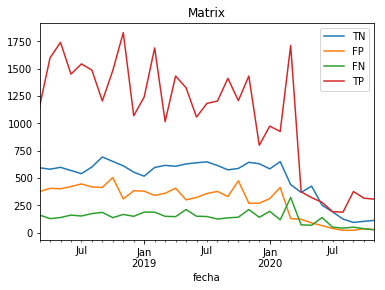

In [217]:
conf_mat_oot.plot(title="Matrix")

In [218]:
#verificar nulls
final_result.isna().any()

id_clte          False
id_oblg          False
fecha            False
propen_y_oblg    False
y_score          False
y_label_AUC      False
y_label_PRC      False
set_type         False
decile           False
dtype: bool

## KEEP FINAL RESULT TO LATE ANALYSIS

In [219]:
final_result.head(5)

,id_clte,id_oblg,fecha,propen_y_oblg,y_score,y_label_AUC,y_label_PRC,set_type,decile
0,281130,4236590000111805,2018-03-01,0,0.496638,1,1,train,3
1,465610,5341250000283356,2019-06-01,1,0.253945,0,0,train,1
3,98877117,421414,2019-04-01,0,0.657720,1,1,train,4
4,98862045,476247,2019-10-01,0,0.088021,0,0,train,0
5,548535,386121,2019-07-01,1,0.783144,1,1,train,6


In [220]:
final_result.shape

(748943, 9)

In [221]:
final_result.to_csv(TAG+"_final_result_17_oob_matrices.csv")

In [222]:
oot =final_result[ final_result.set_type == 'oot']

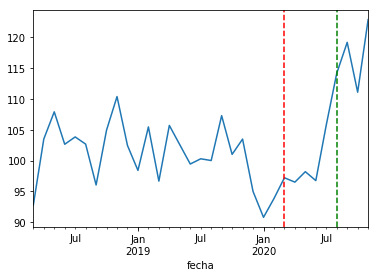

In [223]:
#distancia entre clases
ref = oot[(oot.y_label_AUC ==0)].groupby('fecha')['y_score'].mean() #media de la clase con el efecto x fecha
dist_entre_clases = oot[(oot.y_label_AUC ==1)].groupby('fecha')['y_score'].mean()-oot[(oot.y_label_AUC ==0)].groupby('fecha')['y_score'].mean() #distancia entre clases (diferencia entre medias x mes)
(100*dist_entre_clases/dist_entre_clases['2019-08-01']).plot() # se toma como fecha referencia la mas cercana a validation data set
plt.axvline('2020-03-01', color ='r',linestyle="--", label='inicio pandemia marzo') 
plt.axvline('2020-08-01', color ='g',linestyle="--", label='algo pasa en agosto')

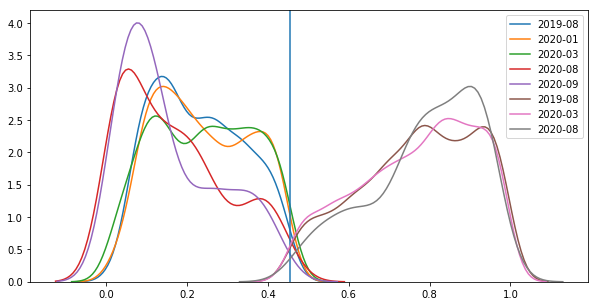

In [224]:
plt.figure(figsize=(10,5))
sns.kdeplot(oot[(oot.y_label_AUC ==0) & (oot.fecha =='2019-08-01')]['y_score'].values, label='2019-08')
sns.kdeplot(oot[(oot.y_label_AUC ==0) & (oot.fecha =='2020-01-01')]['y_score'].values, label='2020-01')
sns.kdeplot(oot[(oot.y_label_AUC ==0) & (oot.fecha =='2020-03-01')]['y_score'].values, label='2020-03')
sns.kdeplot(oot[(oot.y_label_AUC ==0) & (oot.fecha =='2020-08-01')]['y_score'].values, label='2020-08')
sns.kdeplot(oot[(oot.y_label_AUC ==0) & (oot.fecha =='2020-09-01')]['y_score'].values, label='2020-09')
plt.axvline(optimal_thresh_AUC_1)
sns.kdeplot(oot[(oot.y_label_AUC ==1) & (oot.fecha =='2019-08-01')]['y_score'].values, label='2019-08')
sns.kdeplot(oot[(oot.y_label_AUC ==1) & (oot.fecha =='2020-03-01')]['y_score'].values, label='2020-03')
sns.kdeplot(oot[(oot.y_label_AUC ==1) & (oot.fecha =='2020-08-01')]['y_score'].values, label='2020-08')

In [225]:
# 0 = contiene el efecto  (no paga)
ref_date_0=oot[(oot.y_label_AUC ==0) & (oot.fecha =='2018-03-01')]['y_score'].values.mean() # media de la clase con el efecto en la fecha de referencia 
ref_date_0_std = oot[(oot.y_label_AUC ==0) & (oot.fecha =='2018-03-01')]['y_score'].values.std() #std de la clase con el efecto en la fecha de referencia 
mean_rel_drift_0 =100*(oot[(oot.y_label_AUC ==0)].groupby('fecha')['y_score'].mean()-ref_date_0)/ref_date_0
std_rel_drift_0 =100*(oot[(oot.y_label_AUC ==0)].groupby('fecha')['y_score'].std()-ref_date_0_std)/ref_date_0_std

100*(x_auc - ref_auc) /ref_auc

In [226]:
# 1 =  contiene el efecto (no paga)
ref_date_1=oot[(oot.y_label_AUC ==1) & (oot.fecha =='2018-03-01')]['y_score'].values.mean()
ref_date_1_std=oot[(oot.y_label_AUC ==1) & (oot.fecha =='2018-03-01')]['y_score'].values.std()
mean_rel_drift_1 =100*(oot[(oot.y_label_AUC ==1)].groupby('fecha')['y_score'].mean()-ref_date_1)/ref_date_1
std_rel_drift_1 =100*(oot[(oot.y_label_AUC ==1)].groupby('fecha')['y_score'].std()-ref_date_1_std)/ref_date_1_std

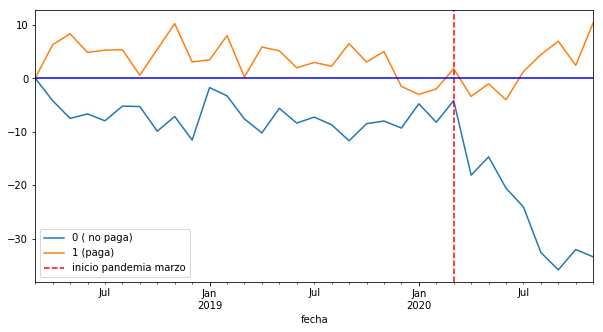

In [295]:
plt.figure(figsize=(10,5))
mean_rel_drift_0.plot(label='0 ( no paga)')
mean_rel_drift_1.plot(label='1 (paga)')
plt.axvline('2020-03-01', color ='r',linestyle="--", label='inicio pandemia marzo')
#plt.axvline('2020-08-01', color ='g',linestyle="--", label='algo pasa en agosto')
plt.axhline(0, color ='b')
plt.legend()

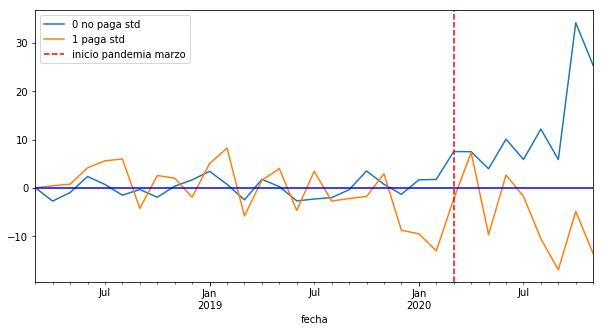

In [296]:
plt.figure(figsize=(10,5))
std_rel_drift_0.plot(label='0 no paga std')
std_rel_drift_1.plot(label='1 paga std')
plt.axvline('2020-03-01', color ='r',linestyle="--", label='inicio pandemia marzo')
#plt.axvline('2020-08-01', color ='g',linestyle="--", label='algo pasa en agosto')
plt.axhline(0, color ='b')
plt.legend()
# NO ES HOMOESKEDASTICA - VOLATILIDAD

## ANALYZES FOR ALL DIFFERENT PRODUCTS IN TEST SET

### tdc

In [229]:
df_tdc = df_test[df_test.flag_tdc_oblg ==1]

In [ ]:
df_tdc.head(5)

In [230]:
y_oot_tdc = df_tdc.propen_y_oblg
print(y_oot_tdc.shape)
y_result_oot_tdc = y_oot_tdc.to_frame().copy()
print(y_result_oot_tdc.shape)
x_oot_cols_tdc = X_train_cv_final.columns.tolist()
X_oot_tdc = df_tdc[x_oot_cols_tdc]
print(X_oot_tdc.shape)
X_oot_final_tdc = X_oot_tdc.copy()
print(X_oot_final_tdc.shape)

(16426,)
(16426, 1)
(16426, 17)
(16426, 17)


In [231]:
#predict_proba without cv
y_prob_oot_tdc = best_model.predict_proba(X_oot_final_tdc)

In [232]:
y_result_oot_tdc["y_score"] = y_prob_oot_tdc[:,1]

In [233]:
result_oot_tdc = pd.concat([df_tdc[["id_clte","fecha"]], y_result_oot_tdc], axis=1)

In [234]:
result_oot_tdc["y_label_AUC"] = np.where(y_result_oot_tdc.y_score >= optimal_thresh_AUC_1, 1,0)
result_oot_tdc["set_type"] = "tdc_oot"

In [235]:
# auc by sets
auc_x_mes_oot_tdc = result_oot_tdc.groupby("fecha").apply(lambda x: roc_auc_score(x["propen_y_oblg"],x["y_score"])) 

In [236]:
auc_x_mes_oot_tdc

fecha
2018-03-01    0.718452
2018-04-01    0.797919
2018-05-01    0.769198
2018-06-01    0.738053
2018-07-01    0.741826
2018-08-01    0.742676
2018-09-01    0.719054
2018-10-01    0.761658
2018-11-01    0.777233
2018-12-01    0.746920
2019-01-01    0.758704
2019-02-01    0.819802
2019-03-01    0.749600
2019-04-01    0.793780
2019-05-01    0.737885
2019-06-01    0.788754
2019-07-01    0.723715
2019-08-01    0.772109
2019-09-01    0.786350
2019-10-01    0.749123
2019-11-01    0.791098
2019-12-01    0.756875
2020-01-01    0.794303
2020-02-01    0.813864
2020-03-01    0.912133
2020-04-01    0.630909
2020-05-01    0.740911
2020-06-01    0.846591
2020-07-01    0.782051
2020-08-01    1.000000
2020-09-01    0.769231
2020-10-01    0.803636
2020-11-01    0.835317
dtype: float64

In [237]:
roc_auc_score(result_oot_tdc.propen_y_oblg, result_oot_tdc.y_score)

0.7731026599071987

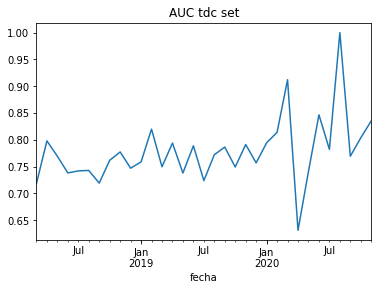

In [238]:
auc_x_mes_oot_tdc.plot(title="AUC tdc set")

### sob

In [239]:
df_sob = df_test[df_test.flag_sob_oblg == 1]

In [240]:
df_sob.shape

(1215, 226)

In [ ]:
df_sob['propen_y_oblg']=np.where(df_sob["propen_y_oblg"] == 1,0,1)
print(df_sob.propen_y_oblg.value_counts()/df_sob.propen_y_oblg.shape[0],"This is Y in oot data for sob")

In [241]:
y_oot_sob = df_sob.propen_y_oblg
print(y_oot_sob.shape)
y_result_oot_sob = y_oot_sob.to_frame().copy()
print(y_result_oot_sob.shape)
x_oot_cols_sob = X_train_cv_final.columns.tolist()
X_oot_sob = df_sob[x_oot_cols_sob]
print(X_oot_sob.shape)
X_oot_final_sob = X_oot_sob.copy()
print(X_oot_final_sob.shape)

(1215,)
(1215, 1)
(1215, 17)
(1215, 17)


In [242]:
#predict_proba without cv
y_prob_oot_sob = best_model.predict_proba(X_oot_final_sob)

In [243]:
y_result_oot_sob["y_score"] = y_prob_oot_sob[:,1]

In [244]:
y_oot_label_sob = np.where(y_result_oot_sob.y_score >= optimal_thresh_AUC_1, 1,0)

In [245]:
y_result_oot_sob.shape

(1215, 2)

In [246]:
result_oot_sob = pd.concat([df_sob[["id_clte","fecha"]], y_result_oot_sob], axis=1)

In [247]:
result_oot_sob["y_label_AUC"] = np.where(y_result_oot_sob.y_score >= optimal_thresh_AUC_1, 1,0)
result_oot_sob["set_type"] = "sob_oot"

In [248]:
# auc by sets
auc_x_mes_oot_sob = result_oot_sob.groupby("fecha").apply(lambda x: roc_auc_score(x["propen_y_oblg"],x["y_score"])) 

ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

In [249]:
auc_x_mes_oot_sob

NameError: name 'auc_x_mes_oot_sob' is not defined

In [250]:
roc_auc_score(result_oot_sob.propen_y_oblg, result_oot_sob.y_score)

0.8215100620095385

In [251]:
auc_x_mes_oot_sob.plot(title="AUC sob set")

NameError: name 'auc_x_mes_oot_sob' is not defined

## pyme

In [252]:
df_pyme = df_test[df_test.flag_pyme_oblg == 1]

In [253]:
df_pyme.shape

(1044, 226)

In [254]:
y_oot_pyme = df_pyme.propen_y_oblg
print(y_oot_pyme.shape)
y_result_oot_pyme = y_oot_pyme.to_frame().copy()
print(y_result_oot_pyme.shape)
x_oot_cols_pyme = X_train_cv_final.columns.tolist()
X_oot_pyme = df_pyme[x_oot_cols_pyme]
print(X_oot_pyme.shape)
X_oot_final_pyme = X_oot_pyme.copy()
print(X_oot_final_pyme.shape)

(1044,)
(1044, 1)
(1044, 17)
(1044, 17)


In [255]:
#predict_proba without cv
y_prob_oot_pyme = best_model.predict_proba(X_oot_final_pyme)

In [256]:
y_result_oot_pyme["y_score"] = y_prob_oot_pyme[:,1]

In [257]:
y_oot_label_pyme = np.where(y_result_oot_pyme.y_score >= optimal_thresh_AUC_1, 1,0)

In [258]:
result_oot_pyme = pd.concat([df_pyme[["id_clte","fecha"]], y_result_oot_pyme], axis=1)

In [259]:
result_oot_pyme["y_label_AUC"] = np.where(y_result_oot_pyme.y_score >= optimal_thresh_AUC_1, 1,0)
result_oot_pyme["set_type"] = "pyme_oot"

In [260]:
# auc by sets
auc_x_mes_oot_pyme = result_oot_pyme.groupby("fecha").apply(lambda x: roc_auc_score(x["propen_y_oblg"],x["y_score"])) 
auc_x_mes_oot_pyme.plot(title="AUC pyme set")
#auc_x_mes_oot_pyme

ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

In [ ]:
auc_x_mes_oot_pyme

In [261]:
roc_auc_score(result_oot_pyme.propen_y_oblg, result_oot_pyme.y_score)

0.8807082287598198

## pp

In [262]:
df_pp = df_test[df_test.flag_pp_oblg == 1]
print(df_pp.shape)

(13325, 226)


In [263]:
y_oot_pp = df_pp.propen_y_oblg
print(y_oot_pp.shape)
y_result_oot_pp = y_oot_pp.to_frame().copy()
print(y_result_oot_pp.shape)
x_oot_cols_pp = X_train_cv_final.columns.tolist()
X_oot_pp = df_pp[x_oot_cols_pp]
print(X_oot_pp.shape)
X_oot_final_pp = X_oot_pp.copy()
print(X_oot_final_pp.shape)

(13325,)
(13325, 1)
(13325, 17)
(13325, 17)


In [264]:
#predict_proba without cv
y_prob_oot_pp = best_model.predict_proba(X_oot_final_pp)
y_result_oot_pp["y_score"] = y_prob_oot_pp[:,1]

In [265]:
y_oot_label_pp = np.where(y_result_oot_pp.y_score >= optimal_thresh_AUC_1, 1,0)
result_oot_pp = pd.concat([df_pp[["id_clte","fecha"]], y_result_oot_pp], axis=1)

In [266]:
result_oot_pp["y_label_AUC"] = np.where(y_result_oot_pp.y_score >= optimal_thresh_AUC_1, 1,0)
result_oot_pp["set_type"] = "pp_oot"

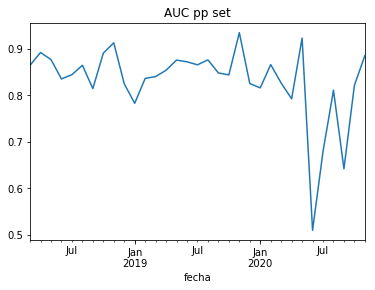

In [267]:
# auc by sets
auc_x_mes_oot_pp = result_oot_pp.groupby("fecha").apply(lambda x: roc_auc_score(x["propen_y_oblg"],x["y_score"])) 
#print(auc_x_mes_oot_pp)
auc_x_mes_oot_pp.plot(title="AUC pp set")

In [268]:
auc_x_mes_oot_pp

fecha
2018-03-01    0.864250
2018-04-01    0.891592
2018-05-01    0.876381
2018-06-01    0.834752
2018-07-01    0.843936
2018-08-01    0.864096
2018-09-01    0.814011
2018-10-01    0.890216
2018-11-01    0.912445
2018-12-01    0.824368
2019-01-01    0.782472
2019-02-01    0.835854
2019-03-01    0.839889
2019-04-01    0.853473
2019-05-01    0.875256
2019-06-01    0.871597
2019-07-01    0.865159
2019-08-01    0.875725
2019-09-01    0.847646
2019-10-01    0.843475
2019-11-01    0.934274
2019-12-01    0.824923
2020-01-01    0.815502
2020-02-01    0.865593
2020-03-01    0.825877
2020-04-01    0.792079
2020-05-01    0.922528
2020-06-01    0.509397
2020-07-01    0.679002
2020-08-01    0.810507
2020-09-01    0.641707
2020-10-01    0.821042
2020-11-01    0.884997
dtype: float64

In [269]:
roc_auc_score(result_oot_pp.propen_y_oblg, result_oot_pp.y_score)

0.8592249788917836

In [270]:
count_response_date_pp = result_oot_pp.groupby(['fecha', 'propen_y_oblg']).count()

In [ ]:
count_response_date_pp

## leasing

In [271]:
df_leasing = df_test[df_test.flag_leas_oblg == 1]
print(df_leasing.shape)

(406, 226)


In [272]:
y_oot_leasing = df_leasing.propen_y_oblg
print(y_oot_leasing.shape)
y_result_oot_leasing = y_oot_leasing.to_frame().copy()
print(y_result_oot_leasing.shape)
x_oot_cols_leasing = X_train_cv_final.columns.tolist()
X_oot_leasing = df_leasing[x_oot_cols_leasing]
print(X_oot_leasing.shape)
X_oot_final_leasing = X_oot_leasing.copy()
print(X_oot_final_leasing.shape)

(406,)
(406, 1)
(406, 17)
(406, 17)


In [273]:
#predict_proba without cv
y_prob_oot_leasing = best_model.predict_proba(X_oot_final_leasing)
y_result_oot_leasing["y_score"] = y_prob_oot_leasing[:,1]

In [274]:
y_oot_label_leasing = np.where(y_result_oot_leasing.y_score >= optimal_thresh_AUC_1, 1,0)
result_oot_leasing = pd.concat([df_leasing[["id_clte","fecha"]], y_result_oot_leasing], axis=1)

In [275]:
result_oot_leasing["y_label_AUC"] = np.where(y_result_oot_leasing.y_score >= optimal_thresh_AUC_1, 1,0)
result_oot_leasing["set_type"] = "leasing_oot"

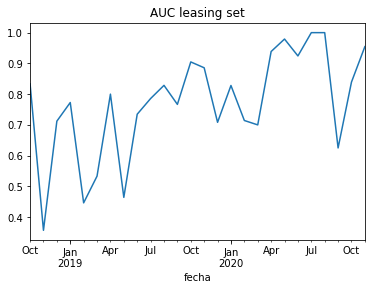

In [276]:
# auc by sets
auc_x_mes_oot_leasing = result_oot_leasing.groupby("fecha").apply(lambda x: roc_auc_score(x["propen_y_oblg"],x["y_score"])) 
#print(auc_x_mes_oot_leasing)
auc_x_mes_oot_leasing.plot(title="AUC leasing set")

In [277]:
auc_x_mes_oot_leasing

fecha
2018-10-01    0.833333
2018-11-01    0.357143
2018-12-01    0.712121
2019-01-01    0.772727
2019-02-01    0.446429
2019-03-01    0.533333
2019-04-01    0.800000
2019-05-01    0.464286
2019-06-01    0.734694
2019-07-01    0.785714
2019-08-01    0.828571
2019-09-01    0.766667
2019-10-01    0.904762
2019-11-01    0.885714
2019-12-01    0.708333
2020-01-01    0.828125
2020-02-01    0.714286
2020-03-01    0.700000
2020-04-01    0.938596
2020-05-01    0.979167
2020-06-01    0.924242
2020-07-01    1.000000
2020-08-01    1.000000
2020-09-01    0.625000
2020-10-01    0.839286
2020-11-01    0.954545
dtype: float64

In [278]:
roc_auc_score(result_oot_leasing.propen_y_oblg, result_oot_leasing.y_score)

0.7470614069079543

## hipoteca

In [279]:
df_hipo = df_test[df_test.flag_hipo_oblg == 1]
print(df_hipo.shape)

(16316, 226)


In [280]:
y_oot_hipo = df_hipo.propen_y_oblg
print(y_oot_hipo.shape)
y_result_oot_hipo = y_oot_hipo.to_frame().copy()
print(y_result_oot_hipo.shape)
x_oot_cols_hipo = X_train_cv_final.columns.tolist()
X_oot_hipo = df_hipo[x_oot_cols_hipo]
print(X_oot_hipo.shape)
X_oot_final_hipo = X_oot_hipo.copy()
print(X_oot_final_hipo.shape)

(16316,)
(16316, 1)
(16316, 17)
(16316, 17)


In [281]:
#predict_proba without cv
y_prob_oot_hipo = best_model.predict_proba(X_oot_final_hipo)
y_result_oot_hipo["y_score"] = y_prob_oot_hipo[:,1]
y_oot_label_hipo = np.where(y_result_oot_hipo.y_score >= optimal_thresh_AUC_1, 1,0)

In [282]:
result_oot_hipo = pd.concat([df_hipo[["id_clte","fecha"]], y_result_oot_hipo], axis=1)
result_oot_hipo["y_label_AUC"] = np.where(y_result_oot_hipo.y_score >= optimal_thresh_AUC_1, 1,0)
result_oot_hipo["set_type"] = "hipo_oot"

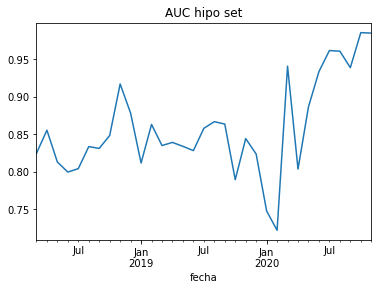

In [283]:
auc_x_mes_oot_hipo = result_oot_hipo.groupby("fecha").apply(lambda x: roc_auc_score(x["propen_y_oblg"],x["y_score"])) 
#print(auc_x_mes_oot_hipo)
auc_x_mes_oot_hipo.plot(title="AUC hipo set")

In [284]:
auc_x_mes_oot_hipo

fecha
2018-03-01    0.824709
2018-04-01    0.855589
2018-05-01    0.813149
2018-06-01    0.799774
2018-07-01    0.804321
2018-08-01    0.833718
2018-09-01    0.831324
2018-10-01    0.848541
2018-11-01    0.917265
2018-12-01    0.878261
2019-01-01    0.811840
2019-02-01    0.863273
2019-03-01    0.835142
2019-04-01    0.839287
2019-05-01    0.834056
2019-06-01    0.828350
2019-07-01    0.858101
2019-08-01    0.866949
2019-09-01    0.863771
2019-10-01    0.789561
2019-11-01    0.844390
2019-12-01    0.823786
2020-01-01    0.747847
2020-02-01    0.722073
2020-03-01    0.940963
2020-04-01    0.803728
2020-05-01    0.886715
2020-06-01    0.933742
2020-07-01    0.961806
2020-08-01    0.960966
2020-09-01    0.938980
2020-10-01    0.985686
2020-11-01    0.985075
dtype: float64

In [285]:
roc_auc_score(result_oot_hipo.propen_y_oblg, result_oot_hipo.y_score)

0.8486720664655478

## Financomer

In [286]:
df_financomer = df_test[df_test.flag_finan_oblg == 1]
print(df_financomer.shape)

(11543, 226)


In [287]:
y_oot_financomer = df_financomer.propen_y_oblg
print(y_oot_financomer.shape)
y_result_oot_financomer = y_oot_financomer.to_frame().copy()
print(y_result_oot_financomer.shape)
x_oot_cols_financomer = X_train_cv_final.columns.tolist()
X_oot_financomer = df_financomer[x_oot_cols_financomer]
print(X_oot_financomer.shape)
X_oot_final_financomer = X_oot_financomer.copy()
print(X_oot_final_financomer.shape)

(11543,)
(11543, 1)
(11543, 17)
(11543, 17)


In [288]:
#predict_proba without cv
y_prob_oot_financomer = best_model.predict_proba(X_oot_final_financomer)
y_result_oot_financomer["y_score"] = y_prob_oot_financomer[:,1]
y_oot_label_financomer = np.where(y_result_oot_financomer.y_score >= optimal_thresh_AUC_1, 1,0)

In [289]:
result_oot_financomer = pd.concat([df_financomer[["id_clte","fecha"]], y_result_oot_financomer], axis=1)
result_oot_financomer["y_label_AUC"] = np.where(y_result_oot_financomer.y_score >= optimal_thresh_AUC_1, 1,0)
result_oot_financomer["set_type"] = "financomer_oot"

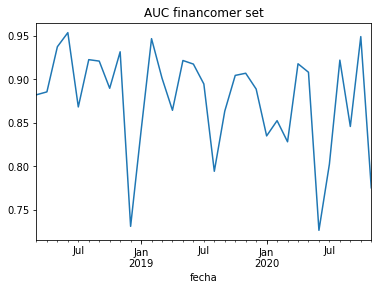

In [290]:
auc_x_mes_oot_financomer = result_oot_financomer.groupby("fecha").apply(lambda x: roc_auc_score(x["propen_y_oblg"],x["y_score"])) 
#print(auc_x_mes_oot_financomer)
auc_x_mes_oot_financomer.plot(title="AUC financomer set")

In [291]:
auc_x_mes_oot_financomer

fecha
2018-03-01    0.882002
2018-04-01    0.885326
2018-05-01    0.937178
2018-06-01    0.953367
2018-07-01    0.868033
2018-08-01    0.922342
2018-09-01    0.920684
2018-10-01    0.889455
2018-11-01    0.931373
2018-12-01    0.730883
2019-01-01    0.840503
2019-02-01    0.946453
2019-03-01    0.901164
2019-04-01    0.864176
2019-05-01    0.921376
2019-06-01    0.917250
2019-07-01    0.894405
2019-08-01    0.794127
2019-09-01    0.863242
2019-10-01    0.904256
2019-11-01    0.906730
2019-12-01    0.888564
2020-01-01    0.834756
2020-02-01    0.852273
2020-03-01    0.827994
2020-04-01    0.917623
2020-05-01    0.907880
2020-06-01    0.726316
2020-07-01    0.802326
2020-08-01    0.921774
2020-09-01    0.845599
2020-10-01    0.948830
2020-11-01    0.775132
dtype: float64

In [292]:
roc_auc_score(result_oot_financomer.propen_y_oblg, result_oot_financomer.y_score)

0.8987840844269432

In [ ]:
count_response_date_finan = result_oot_financomer.groupby(['fecha', 'response_variable']).count()

In [ ]:
count_response_date_finan

## b2b

In [ ]:
df_b2b = df_test[df_test.flag_b2b_oblg == 1]
print(df_b2b.shape)

In [ ]:
y_oot_b2b = df_b2b.response_variable
print(y_oot_b2b.shape)
y_result_oot_b2b = y_oot_b2b.to_frame().copy()
print(y_result_oot_b2b.shape)
x_oot_cols_b2b = X_train_cv_final.columns.tolist()
X_oot_b2b = df_b2b[x_oot_cols_b2b]
print(X_oot_b2b.shape)
X_oot_final_b2b = X_oot_b2b.copy()
print(X_oot_final_b2b.shape)

In [ ]:
#predict_proba without cv
y_prob_oot_b2b = best_model.predict_proba(X_oot_final_b2b)
y_result_oot_b2b["y_score"] = y_prob_oot_b2b[:,1]
y_oot_label_b2b = np.where(y_result_oot_b2b.y_score >= optimal_thresh_AUC_1, 1,0)

In [ ]:
result_oot_b2b = pd.concat([df_b2b[["id_clte","fecha"]], y_result_oot_b2b], axis=1)
result_oot_b2b["y_label_AUC"] = np.where(y_result_oot_b2b.y_score >= optimal_thresh_AUC_1, 1,0)
result_oot_b2b["set_type"] = "b2b_oot"

In [ ]:
auc_x_mes_oot_b2b = result_oot_b2b.groupby("fecha").apply(lambda x: roc_auc_score(x["response_variable"],x["y_score"])) 
print(auc_x_mes_oot_b2b)
auc_x_mes_oot_b2b.plot(title="AUC b2b set")

In [ ]:
roc_auc_score(result_oot_b2b.response_variable, result_oot_b2b.y_score)

## auto

In [ ]:
df_auto = df_test[df_test.flag_auto_oblg == 1]
print(df_auto.shape)

In [ ]:
y_oot_auto = df_auto.response_variable
print(y_oot_auto.shape)
y_result_oot_auto = y_oot_auto.to_frame().copy()
print(y_result_oot_auto.shape)
x_oot_cols_auto = X_train_cv_final.columns.tolist()
X_oot_auto = df_auto[x_oot_cols_auto]
print(X_oot_auto.shape)
X_oot_final_auto = X_oot_auto.copy()
print(X_oot_final_auto.shape)

In [ ]:
#predict_proba without cv
y_prob_oot_auto = best_model.predict_proba(X_oot_final_auto)
y_result_oot_auto["y_score"] = y_prob_oot_auto[:,1]
y_oot_label_auto = np.where(y_result_oot_auto.y_score >= optimal_thresh_AUC_1, 1,0)

In [ ]:
result_oot_auto = pd.concat([df_auto[["id_clte","fecha"]], y_result_oot_auto], axis=1)
result_oot_auto["y_label_AUC"] = np.where(y_result_oot_auto.y_score >= optimal_thresh_AUC_1, 1,0)
result_oot_auto["set_type"] = "auto_oot"

In [ ]:
# auc by sets
auc_x_mes_oot_auto = result_oot_auto.groupby("fecha").apply(lambda x: roc_auc_score(x["response_variable"],x["y_score"])) 
#print(auc_x_mes_oot_auto)
auc_x_mes_oot_auto.plot(title="AUC auto set")

In [ ]:
auc_x_mes_oot_auto

In [ ]:
roc_auc_score(result_oot_auto.response_variable, result_oot_auto.y_score)

In [ ]:
count_response_date_auto = result_oot_auto.groupby(['fecha', 'response_variable']).count()

In [ ]:
count_response_date_auto

# Sensitivity Analysis

In [ ]:
X_train_cv_final.columns.tolist()

In [ ]:
print(df_train.shape,"train data")
print(df_valid.shape,"valid data")
print(df_test.shape,"oot data")

In [ ]:
plt.figure(figsize=(8,5))
sns.kdeplot(df_train.dias_hasta_proximo_pago, label="train")
sns.kdeplot(df_valid.dias_hasta_proximo_pago, label="valid")
sns.kdeplot(df_test.dias_hasta_proximo_pago, label="oot")

# Single Client Sensitivity

In [ ]:
x_oot_cols

In [ ]:
df_oot.head()

In [ ]:
sensitivity_df = df_oot[["id_oblg","fecha","response_variable"]+x_oot_cols].copy()
client_sample = np.random.choice(sensitivity_df["id_oblg"].unique(),1).tolist()
sample_df = sensitivity_df[sensitivity_df.id_oblg.isin(client_sample)]
#sensitivity_df.saldok_fa_oblig = sensitivity_df.saldok_fa_oblig.astype("int64")
#sensitivity_df.saldok_fa_oblig = sensitivity_df.saldok_fa_oblig.astype("int64")
#sensitivity_df.saldok_fa_oblig = sensitivity_df.saldok_fa_oblig.astype("int64")

In [ ]:
def plot_variations_one(df, cols, thresh):
    a = df[df.type =="fake"].groupby(["var_name", "value","type"])["prediction"].mean().reset_index()
    b = df[df.type =="real"].groupby(["var_name", "value","type"])["prediction"].mean().reset_index()
    for col in cols:
        print(col)
        a[(a.var_name == col) & ( a.type =="fake")][["value", "prediction"]].plot.scatter("value", "prediction", figsize=(20,5))
        
        plt.scatter(b[b.var_name == col]["value"],
                    b[b.var_name == col]["prediction"], marker="*", color="red", s=80)
        
        plt.title(col)
        plt.axhline(thresh, color="green", label="threshold")
        plt.legend()
        plt.show()

In [ ]:
unique_cat_vals = list()
cat_cols = sensitivity_df[x_oot_cols].select_dtypes("int64").columns
cont_cols = sensitivity_df[x_oot_cols].select_dtypes(float).columns

for i in cat_cols:
    unique_cat_vals.append(sensitivity_df[x_oot_cols][i].unique())
    
unique_cont_vals = list()
for i in cont_cols:
    if df[i].min() == -999.0:
        unique_cont_vals.append((i, 0, sensitivity_df[x_oot_cols][i].max()))
    else:
        unique_cont_vals.append((i, sensitivity_df[x_oot_cols][i].min(), sensitivity_df[x_oot_cols][i].max()))

In [ ]:
single_record = sensitivity_df[x_oot_cols][sensitivity_df.response_variable == 1].sample(1)

In [ ]:
perturbed_predictions_cat = list()
pred_row_single_cat = single_record[x_oot_cols].copy()
for col_cat, vals in zip(cat_cols, unique_cat_vals):
    perturbed_predictions_cat.append((col_cat, single_record[col_cat].values[0], "real", best_model.predict_proba(pred_row_single_cat)[:,1][0]))
    for val_cat in vals:
        pred_row_single_cat[col_cat] = val_cat
        perturbed_predictions_cat.append((col_cat, val_cat, "fake", best_model.predict_proba(pred_row_single_cat)[:,1][0]))
        pred_row_single_cat[col_cat] = single_record[col_cat].values[0]
        
result_perturbation_cat = pd.DataFrame(perturbed_predictions_cat, columns=["var_name", "value","type", "prediction"])

In [ ]:
perturbed_predictions_cont = list()
pred_row_single_cont = single_record[x_oot_cols].copy()     
for col_cont, minval, maxval in unique_cont_vals:
    perturbed_predictions_cont.append((col_cont, single_record[col_cont].values[0], "real", best_model.predict_proba(pred_row_single_cont)[:,1][0]))
    vals = np.linspace(minval, maxval, 100)
    for val_cont in vals:
        pred_row_single_cont[col_cont] = val_cont
        perturbed_predictions_cont.append((col_cont, val_cont, "fake", best_model.predict_proba(pred_row_single_cont)[:,1][0]))
        pred_row_single_cont[col_cont] = single_record[col_cont].values[0]
result_perturbation_cont = pd.DataFrame(perturbed_predictions_cont, columns=["var_name", "value", "type","prediction"]) 

In [ ]:
single_result = pd.concat([result_perturbation_cat[result_perturbation_cat["type"]=="fake"].groupby("var_name").std()[["prediction"]],
           result_perturbation_cont[result_perturbation_cont["type"]=="fake"].groupby("var_name").std()[["prediction"]]], 
          axis=0 ).sort_values(by="prediction", ascending=False)
single_result.plot(kind="bar", figsize=(20,5))

In [ ]:
optimal_thresh_AUC_1

In [ ]:
plot_variations_one(result_perturbation_cont, cont_cols, optimal_thresh_AUC_1)

In [ ]:
plot_variations_one(result_perturbation_cat, cat_cols, optimal_thresh_AUC_1)

# MEAN VARIABLE SENSITIVITY RESPONSE

In [ ]:
def get_perturbations(model, dfbase, id_col, date_col, x_colnames, NSAMPLES, date_of_interest = None, filter_by_class = None):
    use_cols = [id_col,date_col,"propen_y_oblg"] + x_colnames
    if filter_by_class != None:
        df = dfbase[dfbase.propen_y_oblg == filter_by_class][use_cols]
    else:
        df = dfbase[use_cols].copy()
    
    eval_sample = df[id_col].value_counts()[df[id_col].value_counts() == 12].sample(NSAMPLES).index
    sample_df = df[df[id_col].isin(eval_sample)]
    cat_cols = df[x_colnames].select_dtypes("int64").columns
    cont_cols = df[x_colnames].select_dtypes(float).columns
    
    unique_cat_vals = list()
    for i in cat_cols:
        unique_cat_vals.append(df[i].unique()) 
    
    unique_cont_vals = list()
    for i in cont_cols:
        if df[i].min() == -999.0:
            unique_cont_vals.append((i, 0, df[i].max()))
        else:
            unique_cont_vals.append((i, df[i].min(), df[i].max()))    
 
    if date_of_interest != None:
        sample_df = sample_df[sample_df[date_col] == date_of_interest]
    
    result_pert_total = list()
    for index, row in sample_df.iterrows():
        single_record = row
        perturbed_predictions_cat = list()
        pred_row = single_record[x_colnames].copy()
        for col, vals in zip(cat_cols, unique_cat_vals):
            perturbed_predictions_cat.append((row[id_col],row[date_col],col, pred_row[col], "real", model.predict_proba(pred_row.values.reshape(1, -1) )[:,1][0]))
            for val in vals:
                pred_row[col] = val
                perturbed_predictions_cat.append((row[id_col],row[date_col], col, val, "fake", model.predict_proba(pred_row.values.reshape(1, -1) )[:,1][0]))
                pred_row[col] =  pred_row[col]
        for col, minval, maxval in unique_cont_vals:
            perturbed_predictions_cat.append((row[id_col],row[date_col],col, pred_row[col], "real", model.predict_proba(pred_row.values.reshape(1, -1) )[:,1][0]))
            vals = np.linspace(minval, maxval, 100)
            for val in vals:
                pred_row[col] = val
                perturbed_predictions_cat.append((row[id_col],row[date_col], col, val, "fake", model.predict_proba(pred_row.values.reshape(1, -1) )[:,1][0]))
                pred_row[col] =  pred_row[col]
        result_perturbation_cat = pd.DataFrame(perturbed_predictions_cat, columns=["id_clte","fecha", "var_name", "value","type", "prediction"])
        result_pert_total.append(result_perturbation_cat)
        
    return pd.concat(result_pert_total, axis=0)



In [ ]:
sensitivity_df = df_oot.copy()
#sensitivity_df.repr_rodamientos_12m = sensitivity_df.repr_rodamientos_12m.astype("int64")
#sensitivity_df.repr_ddir_cliente_12m = sensitivity_df.repr_ddir_cliente_12m.astype("int64")
#sensitivity_df.repr_mora_sup_61_12m = sensitivity_df.repr_mora_sup_61_12m.astype("int64")

In [ ]:
perturb_total = get_perturbations(model = best_model, 
                                  dfbase = sensitivity_df, 
                                  id_col = "id_clte",
                                  date_col = "fecha", 
                                  x_colnames = x_oot_cols, 
                                  NSAMPLES = 10, 
                                  date_of_interest= "2019-12-01",
                                  filter_by_class = 0)

In [ ]:
ranking_perturb = ((perturb_total[perturb_total.type =="fake"].groupby(["var_name", "value","type"])["prediction"].mean())).reset_index()

In [ ]:
def plot_variations(df, cols, thresh):
    a = df[df.type =="fake"].groupby(["var_name", "value","type"])["prediction"].mean().reset_index()
    for col in cols:
        a[(a.var_name == col) & ( a.type =="fake")][["value", "prediction"]].plot.scatter("value", "prediction", figsize=(20,5))
        plt.title(col)
        plt.axhline(thresh, color="green", label="threshold")
        plt.legend()

In [ ]:
ranking_perturb[ranking_perturb["type"]=="fake"].groupby("var_name").std().sort_values("prediction", ascending=False)

In [ ]:
ranking_perturb[ranking_perturb["type"]=="fake"].groupby("var_name").std()[["prediction"]].sort_values( by="prediction",ascending=False).plot(kind="bar", figsize=(20,5))

In [ ]:
plot_variations(ranking_perturb, x_oot_cols, optimal_thresh_AUC_1)